# i. Pendahuluan

<h4>Dataset yang digunakan : </h4> 
Dataset yang digunakan adalah data informasi customer saat menggunakan produk.
<h4>Objective : </h4>

Project ini bertujuan untuk memprediksi apakah seorang customer berpotensi untuk berhenti dalam memakai produk (churn) yang perusahaan tawarkan atau tidak.

<h4>Link Website Model Deployment:</h4> 

https://huggingface.co/spaces/AnandaKhairurriza/P2Milestone1


# ii. Import Libraries

In [1]:
# Agar reset seed dapat bekerja
import os

import numpy as np # Untuk mengolah array
import pandas as pd # Untuk mengolah data tabular
from scipy import stats # Untuk uji korelasi
from sklearn.model_selection import train_test_split # Untuk memisahkan train set dan test set
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder # Untuk scaling dan encoding
import category_encoders as ce # Untuk encoding
import random

# Untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk evaluasi model
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score, roc_auc_score

# Untuk korelasi menggunakan phik
import phik
from phik import resources, report

# Untuk menyimpan fitur, scaler, dan encoder
import pickle
import json

# Untuk merancang model ANN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, concatenate, Dropout
from tensorflow.keras import Model

# iii. Data Loading
Pada tahap ini dilakukan penyiapan dataset (load, periksa ukuran) sebelum dilakukan analisis dan pengolahan.

In [11]:
# Load data csv
df = pd.read_csv("churn.csv")

In [12]:
# Menampilkan 10 data awal
df.head(10)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.490000,38604.69,10.0,627.48000,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,338.150000,7665.66,17.0,575.97000,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.140000,37671.69,5.0,767.93000,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,56.670000,15678.14,11.0,590.22000,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.990000,8422.68,0.0,722.04000,Yes,No,No,Not Applicable,Poor Product Quality,0
5,96fbb6f63244b1f4,35,M,Town,Premium Membership,2016-08-16,No,Credit/Debit Card Offers,NaN,Wi-Fi,...,1397.318999,29664.01,28.0,782.49000,No,Yes,Yes,Unsolved,Poor Product Quality,0
6,a52bc51378ecb057,43,M,NaN,Gold Membership,2017-03-09,Yes,Gift Vouchers/Coupons,Smartphone,Mobile_Data,...,416.300000,13160.39,24.0,712.94000,Yes,No,No,Not Applicable,No reason specified,1
7,94f338d20bf0f2b2,15,M,City,No Membership,2016-09-11,No,Credit/Debit Card Offers,Smartphone,Wi-Fi,...,34.070000,9151.14,29.0,655.43000,Yes,No,No,Not Applicable,No reason specified,1
8,85c7996b17862e57,49,M,Town,Platinum Membership,2017-04-24,Yes,Without Offers,NaN,Fiber_Optic,...,650.120000,81628.48,11.0,0.00000,Yes,Yes,No,Not Applicable,Products always in Stock,0
9,8a1625846d7a198b,35,F,Town,Basic Membership,2016-12-01,Yes,Credit/Debit Card Offers,Desktop,Mobile_Data,...,106.230000,28232.59,16.0,984.93392,No,Yes,No,Not Applicable,Too many ads,1


In [13]:
# Menampilkan 10 data terakhir
df.tail(10)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
37000,8a0fff47b7846031,25,F,Town,No Membership,2017-01-20,No,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,119.830000,13147.91,0.0,1019.382051,Yes,No,Yes,Solved in Follow-up,Poor Product Quality,1
37001,8832eec42dc0e347,38,M,Town,Silver Membership,2016-09-19,NaN,Credit/Debit Card Offers,Smartphone,Wi-Fi,...,34.790000,30820.83,23.0,631.830000,Yes,No,Yes,Unsolved,Poor Customer Service,1
37002,b9d9761f4d367c7a,49,F,City,No Membership,2017-12-12,NaN,Without Offers,Both,Wi-Fi,...,499.510000,17110.71,24.0,587.010000,Yes,No,No,Not Applicable,Poor Customer Service,1
37003,a38816e7522f5f7b,42,F,Town,Basic Membership,2017-07-05,Yes,Gift Vouchers/Coupons,Both,Wi-Fi,...,529.580000,42964.11,18.0,619.280000,Yes,Yes,No,Not Applicable,Poor Product Quality,1
37004,8968d0458164dda9,19,F,Town,Gold Membership,2016-07-17,Yes,Without Offers,Smartphone,Fiber_Optic,...,119.960000,14218.43,7.0,781.840000,Yes,No,No,Not Applicable,Too many ads,0
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,199.330000,29455.29,9.0,846.520000,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,...,368.500000,27038.47,8.0,835.980000,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,...,272.130000,39305.35,27.0,714.900000,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,...,65.070000,46108.73,6.0,744.990000,No,Yes,No,Not Applicable,Poor Website,0
37009,93b5d0330d24fa15,36,M,Town,Gold Membership,2016-10-18,NaN,Without Offers,Both,Fiber_Optic,...,972.776679,26905.49,22.0,700.930000,Yes,No,Yes,No Information Available,Poor Customer Service,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       37010 non-null  object 
 1   age                           37010 non-null  int64  
 2   gender                        36951 non-null  object 
 3   region_category               31579 non-null  object 
 4   membership_category           37010 non-null  object 
 5   joining_date                  37010 non-null  object 
 6   joined_through_referral       31568 non-null  object 
 7   preferred_offer_types         36722 non-null  object 
 8   medium_of_operation           31615 non-null  object 
 9   internet_option               37010 non-null  object 
 10  last_visit_time               37010 non-null  object 
 11  days_since_last_login         37010 non-null  int64  
 12  avg_time_spent                37010 non-null  float64
 13  a

Berdasarkan informasi dataset, dari 22 kolom sebanyak 7 kolom bertype numerik dan 15 kolom bertype string/object. Selain itu terdapat data null pada kolom gender, region_category, joined_through_referral, preferred_offer_types, dan medium of operation. Hal itu ditandai dengan jumlah data non-null tidak sama dengan jumlah data pada dataset (37010).

Berikut adalah informasi dari setiap kolom pada dataset:
<li><b>user_id : </b>ID customer</li>
<li><b>age : </b>Umur customer</li>
<li><b>gender : </b>Jenis kelamin customer</li>
<li><b>region_category : </b>Wilayah asal customer</li>
<li><b>membership_category : </b>Jenis membership yang digunakan customer</li>
<li><b>joining_date : </b>Tanggal dimana customer menjadi member</li>
<li><b>joined_through_referral : </b>Menandakan apakah customer join menggunakan referral code atau ID</li>
<li><b>preferred_offer_types : </b>Jenis penawaran yang disukai customer</li>
<li><b>medium_of_operation : </b>Media yang digunakan customer untuk transaksi</li>
<li><b>internet_option : </b>Jenis internet yang digunakan customer</li>
<li><b>last_visit_time : </b>Terakhir kali customer mengunjungi website</li>
<li><b>days_since_last_login : </b>Jumlah hari sejak customer terakhir login ke website</li>
<li><b>avg_time_spent : </b>Rata-rata waktu yang dihabiskan customer mengunjungi website</li>
<li><b>avg_transaction_value : </b>Rata-rata jumlah transaksi yang dilakukan user</li>
<li><b>avg_frequency_login_days : </b>Rata-rata frekuensi user login ke website dalam sehari</li>
<li><b>points_in_wallet : </b>Poin yang diberikan customer saat transaksi</li>
<li><b>used_special_discount : </b>Menandakan apakah customer menggunakan diskon yang ditawarkan</li>
<li><b>offer_application_preference : </b>Menandakan apakah customer menyukai tawaran</li>
<li><b>past_complaint : </b>Menandakan apakah customer pernah mengajukan komplain</li>
<li><b>complaint_status : </b>Status penanganan komplain customer</li>
<li><b>feedback : </b>Feedback dari customer</li>
<li><b>churn_risk_score : </b>Prediksi apakah customer akan berhenti menggunakan produk atau tidak (1 : churn, 0 : tidak churn)</li>

In [15]:
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
count,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000
mean,37.120697,-41.943502,279.201356,29272.430216,14.659540,623.590885,0.540881
std,15.866834,228.875324,330.017336,19445.963492,9.478756,270.218956,0.498333
min,10.000000,-999.000000,0.000000,800.460000,0.000000,0.000000,0.000000
25%,23.000000,8.000000,60.122500,14177.835000,7.000000,574.220000,0.000000
50%,37.000000,12.000000,161.770000,27554.485000,14.000000,680.400000,1.000000
75%,51.000000,16.000000,356.525000,40858.672500,22.000000,756.990000,1.000000
max,64.000000,26.000000,3235.578521,99914.050000,73.061995,2069.069761,1.000000


Dari informasi kolom numerik pada dataset, umur minmal customer adalah 10 tahun. umur maksimal customer adalah 64 tahun, dan rata-rata umur customer adalah 37 tahun. Artinya sebagian besar customer adalah orang dewasa.

In [16]:
# Copy dataset ke variabel baru
df_copy = df.copy()

# iv. Exploratory Data Analysis (EDA)
Pada tahap ini dilakukan eksplorasi terhadap dataset untuk mengetahui informasi data lebih detail.

#### Perbandingan customer yang churn dengan yang tidak

([<matplotlib.patches.Wedge at 0x1c5290a75b0>,
 [Text(-0.14088605192229783, 1.090940475174401, '1'),
  Text(0.1408861540635161, -1.090940461983692, '0')],
 [Text(-0.07684693741216245, 0.5950584410042187, '54.1%\n(20018)'),
  Text(0.07684699312555422, -0.5950584338092865, '45.9%\n(16992)')])

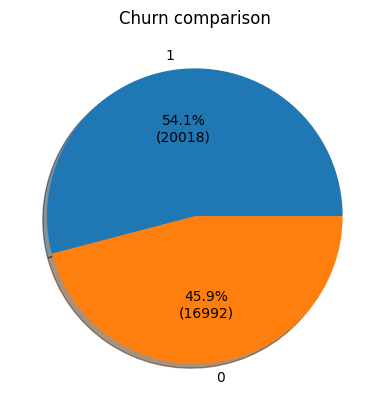

In [17]:
def fmt(x):
    return "{:.1f}%\n({:.0f})".format(x, len(df_copy)*x/100)

de_cmp = df_copy["churn_risk_score"].value_counts()
plt.title("Churn comparison")
plt.pie(de_cmp, labels=de_cmp.index, shadow = True, autopct=fmt)

Dari hasil perbandingan, sebanyak 20.018 customer (54.1%) terindikasi churn. Sedangkan sisanya sebanyak 16.992 customer tidak terindikasi churn (45.9%). Dapat dikatakan jumlah keduanya pada dataset cukup seimbang.

#### Jumlah customer berdasarkan membership

([<matplotlib.patches.Wedge at 0x1c5290f7b50>,
 [Text(0.8717451861847358, 0.6708653593410084, 'Basic Membership'),
  Text(-0.4223100434234805, 1.0157038088063164, 'No Membership'),
  Text(-1.0984324504096203, -0.05870393417069189, 'Gold Membership'),
  Text(-0.460281969973774, -0.9990698214424565, 'Silver Membership'),
  Text(0.4836437295841951, -0.9879720354513534, 'Premium Membership'),
  Text(1.0261276238135646, -0.3963106100607553, 'Platinum Membership')],
 [Text(0.47549737428258315, 0.36592655964055, '20.9%\n(7727)'),
  Text(-0.2303509327764439, 0.5540202593488998, '20.8%\n(7693)'),
  Text(-0.599144972950702, -0.0320203277294683, '18.4%\n(6799)'),
  Text(-0.2510628927129676, -0.5449471753322489, '16.2%\n(5991)'),
  Text(0.2638056706822882, -0.53889383751892, '12.0%\n(4458)'),
  Text(0.5597059766255806, -0.21616942366950287, '11.7%\n(4342)')])

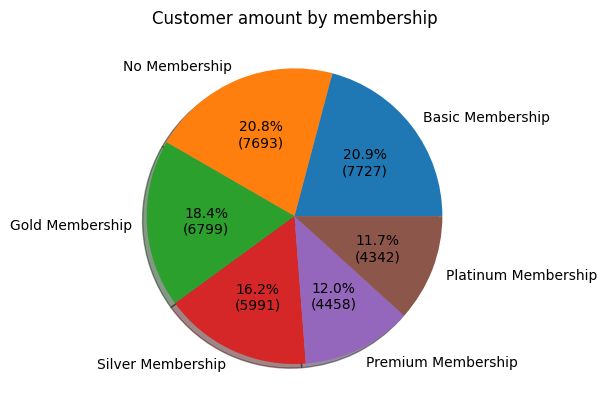

In [18]:
def fmt(x):
    return "{:.1f}%\n({:.0f})".format(x, len(df_copy)*x/100)

de_cmp = df_copy["membership_category"].value_counts()
plt.title("Customer amount by membership")
plt.pie(de_cmp, labels=de_cmp.index, shadow = True, autopct=fmt)

Dari hasil pie chart didapatkan informasi sebagai berikut:
<ul>
    <li>Sebanyak 7693 customer (20.8%) bukan membership</li>
    <li>Sebanyak 7727 customer (20.9%) adalah basic membership</li>
    <li>Sebanyak 4342 customer (11.7%) adalah platinum membership</li>
    <li>Sebanyak 4458 customer (12%) adalah premium membership</li>
    <li>Sebanyak 5991 customer (16.2%) adalah silver membership</li>
    <li>Sebanyak 6799 customer (18.4%) adalah gold membership</li>
</ul>

Artinya sebagian besar customer adalah basic membership atau no membership.

#### Rentang persebaran transaksi dan rata-rata waktu yang dihabiskan customer

Text(0.5, 1.0, 'Histogram time spent')

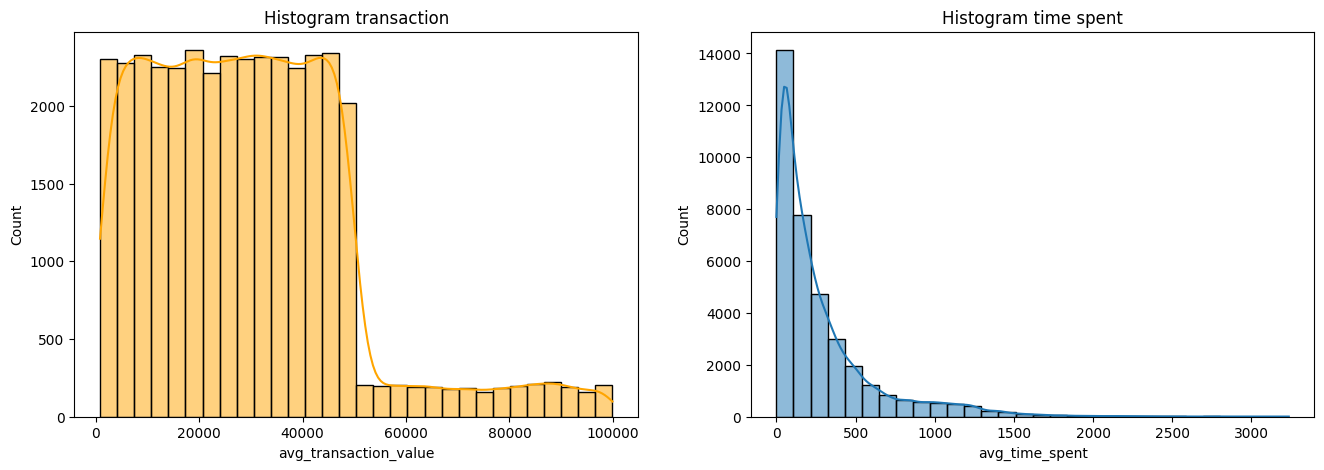

In [19]:
plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=df_copy.avg_transaction_value, bins=30, kde=True, color="orange")
plt.title("Histogram transaction")

plt.subplot(1, 2, 2)
sns.histplot(data=df_copy.avg_time_spent, bins=30, kde=True)
plt.title("Histogram time spent")

Dari hasil histogram, sebagian besar customer melakukan transaksi sebesar 0 hingga 50.000 dollar. Kemudian sebagian besar customer menghabiskan waktu dalam mengunjungi website adalah 0 hingga sekitar 200 jam.

#### Perbandingan rata-rata waktu penggunaan dan penggunaan diskon gender

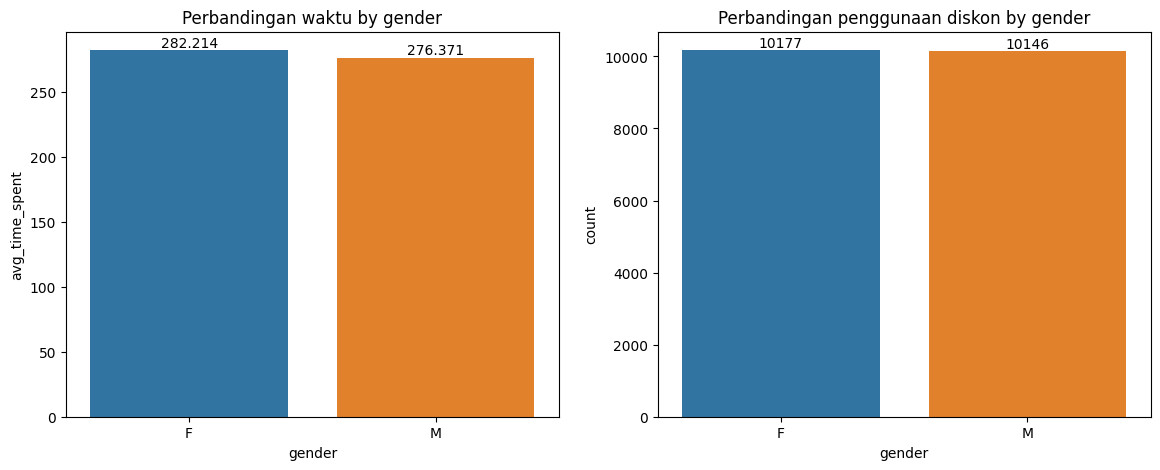

In [20]:
time_df = pd.DataFrame(df_copy[["gender", "avg_time_spent"]].groupby("gender")["avg_time_spent"].mean())
disc_df = pd.DataFrame(df_copy[df_copy["used_special_discount"] == "Yes"].groupby("gender")["user_id"].count())

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.title("Perbandingan waktu by gender")
bp = sns.barplot(data=time_df, x=time_df.index, y=time_df.avg_time_spent)

for i in bp.containers:
    bp.bar_label(i,)

plt.subplot(1, 2, 2)
plt.title("Perbandingan penggunaan diskon by gender")
bp = sns.barplot(data=disc_df, x=disc_df.index, y=disc_df.user_id)
plt.ylabel("count")

for i in bp.containers:
    bp.bar_label(i,)

#### Perbandingan jumlah transaksi berdasarkan membership

Dari hasil barchart, pada rata-rata perbandingan waktu customer wanita lebih banyak menghabiskan waktu lebih banyak dalam mengunjungi website (282.2 jam) dibandingkan dengan customer pria (276.3 jam). Kemudian dalam perbandingan penggunaan diskon, kedua jenis customer tidak terlalu berbeda hanya saja customer wanita sedikit lebih banyak dalam jumlah penggunaan diskon (10177) dibandingkan dengan pria (10146).

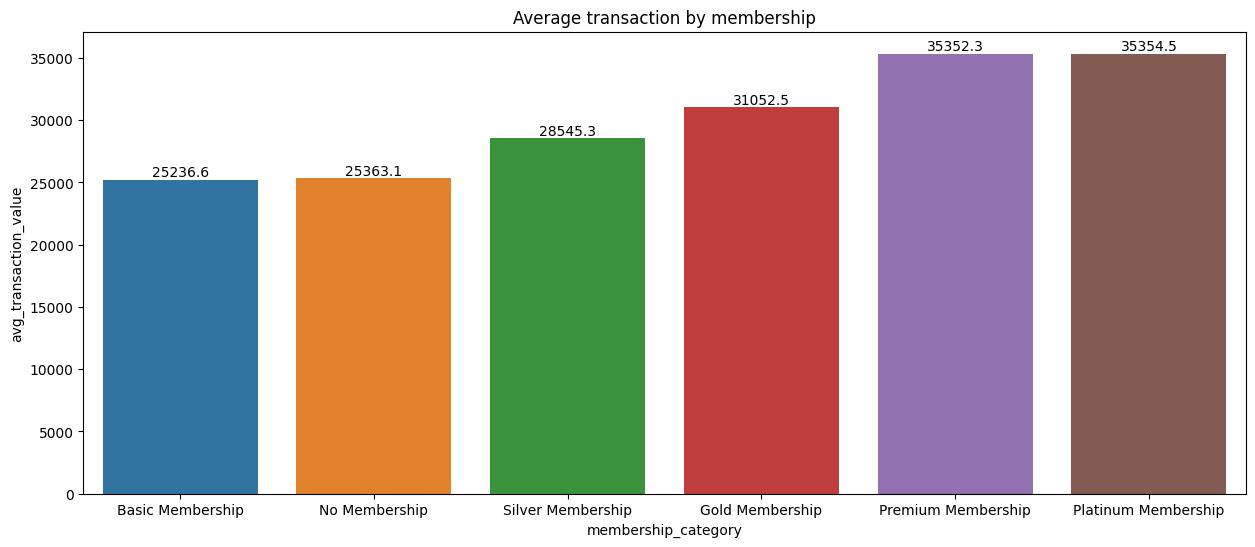

In [21]:
member_df = pd.DataFrame(df_copy[["membership_category", "avg_transaction_value"]].groupby("membership_category")["avg_transaction_value"].mean().sort_values())
plt.figure(figsize=(15,6))
plt.title("Average transaction by membership")
bp = sns.barplot(data=member_df, x=member_df.index, y=member_df.avg_transaction_value)

for i in bp.containers:
    bp.bar_label(i,)

Dari hasil barchart, urutan jumlah transaksi dari yang terendah adalah basic membership, no membership, silver membership, gold membership, premium membership, dan platinum membership. Dapat dikatakan semakin besar tingkatan membership customer maka semakin besar jumlah transaksi yang dilakukan.

# v. Feature Engineering

#### Train val test split
Pada tahap ini akan dilakukan pemisahan fitur untuk train set, validation set dan test set

In [22]:
X = df_copy.drop("churn_risk_score", axis=1)
y = df_copy["churn_risk_score"]

In [23]:
# Split antara Train-Set, Val-Set, dan Test-Set

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=7)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=7)

print("Train Size : ", X_train.shape)
print("Val Size : ", X_val.shape)
print("Test Size : ", X_test.shape)

Train Size :  (26739, 21)
Val Size :  (4719, 21)
Test Size :  (5552, 21)


Hasil proses diatas adalah hasil split antara train, validation, dan test set. Dimana train set berjumlah 26739 data, validation set berjumlah 4719 data, dan test set berjumlah 5552 data.

### Handling Missing Values

##### Check missing value di fitur

In [24]:
# Check missing value di X_train
X_train.isnull().sum()

user_id                            0
age                                0
gender                            42
region_category                 3928
membership_category                0
joining_date                       0
joined_through_referral         3912
preferred_offer_types            201
medium_of_operation             3937
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
dtype: int64

In [25]:
# Check missing value di X_val
X_val.isnull().sum()

user_id                           0
age                               0
gender                            5
region_category                 693
membership_category               0
joining_date                      0
joined_through_referral         692
preferred_offer_types            45
medium_of_operation             686
internet_option                   0
last_visit_time                   0
days_since_last_login             0
avg_time_spent                    0
avg_transaction_value             0
avg_frequency_login_days          0
points_in_wallet                  0
used_special_discount             0
offer_application_preference      0
past_complaint                    0
complaint_status                  0
feedback                          0
dtype: int64

In [26]:
# Check missing value di X_test
X_test.isnull().sum()

user_id                           0
age                               0
gender                           12
region_category                 810
membership_category               0
joining_date                      0
joined_through_referral         838
preferred_offer_types            42
medium_of_operation             772
internet_option                   0
last_visit_time                   0
days_since_last_login             0
avg_time_spent                    0
avg_transaction_value             0
avg_frequency_login_days          0
points_in_wallet                  0
used_special_discount             0
offer_application_preference      0
past_complaint                    0
complaint_status                  0
feedback                          0
dtype: int64

Dari hasil pengecekan missing value di fitur, masing-masing train, val, dan test set terdapat missing value pada fitur gender, region_category, joined_through_referral, preferred_offer_types, dan medium_of_operation.

In [27]:
# Check tipe data fitur
X_train[["gender", "region_category", "joined_through_referral", "preferred_offer_types", "medium_of_operation"]].dtypes

gender                     object
region_category            object
joined_through_referral    object
preferred_offer_types      object
medium_of_operation        object
dtype: object

Tipe data fitur yang terdapat missing value semua adalah string/object, maka akan dilakukan pengisian missing value dengan metode mode/modus dari masing-masing fitur.

In [28]:
# Ambil mode dari setiap fitur
mode_gender = X_train.gender.mode()[0]
mode_region_category = X_train.region_category.mode()[0]
mode_joined_through_referral = X_train.joined_through_referral.mode()[0]
mode_preferred_offer_types = X_train.preferred_offer_types.mode()[0]
mode_medium_of_operation_category = X_train.medium_of_operation.mode()[0]

# Input missing value
X_train.gender.fillna(mode_gender, inplace=True)
X_val.gender.fillna(mode_gender, inplace=True)
X_test.gender.fillna(mode_gender, inplace=True)

X_train.region_category.fillna(mode_region_category, inplace=True)
X_val.region_category.fillna(mode_region_category, inplace=True)
X_test.region_category.fillna(mode_region_category, inplace=True)

X_train.joined_through_referral.fillna(mode_joined_through_referral, inplace=True)
X_val.joined_through_referral.fillna(mode_joined_through_referral, inplace=True)
X_test.joined_through_referral.fillna(mode_joined_through_referral, inplace=True)

X_train.preferred_offer_types.fillna(mode_preferred_offer_types, inplace=True)
X_val.preferred_offer_types.fillna(mode_preferred_offer_types, inplace=True)
X_test.preferred_offer_types.fillna(mode_preferred_offer_types, inplace=True)

X_train.medium_of_operation.fillna(mode_medium_of_operation_category, inplace=True)
X_val.medium_of_operation.fillna(mode_medium_of_operation_category, inplace=True)
X_test.medium_of_operation.fillna(mode_medium_of_operation_category, inplace=True)

In [29]:
# Check kembali missing value di X_train
X_train.isnull().sum()

user_id                         0
age                             0
gender                          0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
dtype: int64

In [30]:
# Check kembali missing value di X_val
X_train.isnull().sum()

user_id                         0
age                             0
gender                          0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
dtype: int64

In [31]:
# Check kembali missing value di X_test
X_train.isnull().sum()

user_id                         0
age                             0
gender                          0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
dtype: int64

Setelah dilakukan pengecekan kembali semua missing value di fitur telah dihandle (tidak ada lagi missing value).

##### Check missing value di target

In [32]:
# Check missing value di y_train
y_train.isnull().sum()

0

In [33]:
# Check missing value di y_val
y_val.isnull().sum()

0

In [34]:
# Check missing value di y_test
y_test.isnull().sum()

0

Dari hasil pengecekan missing value di target, tidak ada missing value pada target.

### Handling outliers

In [35]:
# Ambil fitur numerik
num_col = X_train.select_dtypes(include=np.number).columns.tolist() # Ambil kolom yang numerik
num_col

['age',
 'days_since_last_login',
 'avg_time_spent',
 'avg_transaction_value',
 'avg_frequency_login_days',
 'points_in_wallet']

In [36]:
# Cek outlier pada fitur numerik
for c in num_col:
    IQR = X_train[c].quantile(0.75) - X_train[c].quantile(0.25)

    batas_atas = X_train[c].quantile(0.75) + (1.5 * IQR)
    batas_bawah = X_train[c].quantile(0.25) - (1.5 * IQR)
    print(c)
    print("Batas atas : ", batas_atas)
    print("Batas bawah : ", batas_bawah)
    print("Data diatas batas atas : {}".format(len(X_train[X_train[c] > batas_atas])))
    print("Data dibawah batas bawah : {}".format(len(X_train[X_train[c] < batas_bawah])))
    print("Value maks : ", X_train[c].max())
    print("Value min : ", X_train[c].min())
    print("\n")

age
Batas atas :  93.0
Batas bawah :  -19.0
Data diatas batas atas : 0
Data dibawah batas bawah : 0
Value maks :  64
Value min :  10


days_since_last_login
Batas atas :  28.0
Batas bawah :  -4.0
Data diatas batas atas : 0
Data dibawah batas bawah : 1403
Value maks :  26
Value min :  -999


avg_time_spent
Batas atas :  797.72
Batas bawah :  -382.92
Data diatas batas atas : 2269
Data dibawah batas bawah : 0
Value maks :  3235.5785210942604
Value min :  0.0


avg_transaction_value
Batas atas :  80965.81
Batas bawah :  -25782.989999999998
Data diatas batas atas : 819
Data dibawah batas bawah : 0
Value maks :  99914.05
Value min :  800.46


avg_frequency_login_days
Batas atas :  44.5
Batas bawah :  -15.5
Data diatas batas atas : 181
Data dibawah batas bawah : 0
Value maks :  73.06199459430009
Value min :  0.0


points_in_wallet
Batas atas :  1031.5349999999999
Batas bawah :  298.2550000000001
Data diatas batas atas : 1296
Data dibawah batas bawah : 3522
Value maks :  2069.069760814851
Valu

Dari hasil pengecekan outlier, terdapat outlier pada fitur days_since_last_login, avg_time_spent, avg_transaction_value, avg_frequency_login_days, dan points_in_wallet. Untuk outlier pada fitur avg_time_spent, avg_transaction_value, avg_frequency_login_days, dan points_in_wallet akan diabaikan karena outlier tersebut merupakan data alami (bukan error input) karena bisa saja data customer mencapai value tersebut. Tetapi pada outlier pada fitur days_since_last_login didapatkan nilai outlier menyentuh angka negatif (hingga -999), sedangkan last login customer tidak mungkin mencapai angka negatif. Selanjutnya akan dilakukan analisa mengapa value pada fitur tersebut bisa terjadi.

In [37]:
# Check value pada days_since_last_login di train
val = X_train.days_since_last_login.unique()
val.sort()
val

array([-999,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
         22,   23,   24,   25,   26], dtype=int64)

In [38]:
# Check value pada days_since_last_login di val
val = X_val.days_since_last_login.unique()
val.sort()
val

array([-999,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
         22,   23,   24,   25,   26], dtype=int64)

In [39]:
# Check value pada days_since_last_login di test
val = X_test.days_since_last_login.unique()
val.sort()
val

array([-999,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
         22,   23,   24,   25,   26], dtype=int64)

Dari hasil diatas didapatkan last login customer dari 1 hari yang lalu hingga 26 hari yang lalu. Tetapi tidak ada satupun customer yang last loginnya adalah 0 (hari itu juga), sehingga secara asumsi nilai -999 seharusnya adalah 0 (hari itu juga terakhir customer login). Maka selanjutnya nilai outlier tersebut (-999) akan direplace dengan angka 0 (teknik yang sama seperti input missing value ke 0).

In [40]:
# Replace outlier value dengan 0
X_train.loc[X_train["days_since_last_login"] == -999, "days_since_last_login"] = 0
X_val.loc[X_val["days_since_last_login"] == -999, "days_since_last_login"] = 0
X_test.loc[X_test["days_since_last_login"] == -999, "days_since_last_login"] = 0

### Feature Selection

Selanjutnya akan dilakukan seleksi fitur yang memiliki korelasi terhadap nilai target. Untuk seleksi fitur digunakan metode Phik correlation dan Chi-Square test. Phik correlation digunakan untuk mencari korelasi antara fitur numerik dengan target (kategorik). Sedangkan Chi-Square test digunakan untuk mencari korelasi antara fitur kategorik dengan target (kategorik).

In [41]:
num_col = X_train.select_dtypes(include=np.number).columns.tolist() # Ambil fitur numerik
cat_col = X_train.select_dtypes(include=["object"]).columns.tolist() # Ambil fitur kategorik

interval columns not set, guessing: ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'churn_risk_score']


<AxesSubplot: >

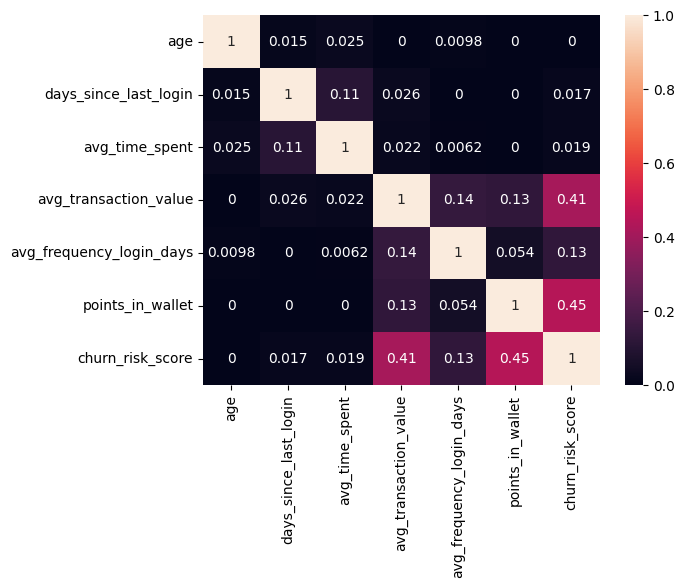

In [42]:
phik = pd.concat([X_train[num_col], y_train], axis=1)

sns.heatmap(phik.phik_matrix(), annot=True)

Dari hasil korelasi, fitur avg_transaction_value dan points_in_wallet memiliki korelasi yang cukup kuat terhadap target (churn_risk_score). Maka kedua fitur numerik ini akan dipilih untuk modeling.

In [43]:
# Cek korelasi fitur kategori dengan target dengan Chi-Square

p_list = []

for c in cat_col:
    chisq_df = pd.concat([X_train, y_train], axis=1)
    contingency_table=pd.crosstab(chisq_df[c], chisq_df["churn_risk_score"])
    stat, p, dof, expected = stats.chi2_contingency(contingency_table)
    p_list.append(p)

In [44]:
d ={
    "Column" : cat_col,
    "P_Val" : p_list
}
p_result = pd.DataFrame(data=d)
p_result[p_result.P_Val <= 0.05] # Ambil fitur yang dependen dgn target

,Column,P_Val
2,region_category,4.084766e-03
3,membership_category,0.000000e+00
5,joined_through_referral,1.559371e-07
6,preferred_offer_types,9.699945e-12
7,medium_of_operation,3.504110e-04
11,offer_application_preference,1.137672e-03
14,feedback,0.000000e+00


Dari hasil uji korelasi menggunakan Chi-Square, fitur kategorik yang termasuk berkolerasi dengan target adalah region_category, membership_category, joined_through_referral, preferred_offer_types, medium_of_operation, offer_application_preference, dan feedback. Karena nilai p valuenya berada dibawah nilai p yang ditetapkan (0.05). Maka fitur kategorik tersebut akan dipilih untuk modeling.

In [45]:
# Drop fitur yang tidak dibutuhkan
unused_feature = ["age", "days_since_last_login", "avg_time_spent", "avg_frequency_login_days", "user_id", "gender", "joining_date", 
"internet_option", "last_visit_time", "used_special_discount","past_complaint", "complaint_status"]

# Drop kolom/fitur tidak dibutuhkan
X_train.drop(columns=unused_feature, axis=1, inplace=True)
X_val.drop(columns=unused_feature, axis=1, inplace=True)
X_test.drop(columns=unused_feature, axis=1, inplace=True)

In [46]:
num_columns = X_train.select_dtypes(include=np.number).columns.tolist() # Ambil fitur numerik
cat_columns = X_train.select_dtypes(include=["object"]).columns.tolist() # Ambil fitur kategorik

In [47]:
# Memasukkan fitur numerik ke variabel
X_train_num = X_train[num_columns]
X_val_num = X_val[num_columns]
X_test_num = X_test[num_columns]

# Memasukkan fitur kategorik ke variabel
X_train_cat = X_train[cat_columns]
X_val_cat = X_val[cat_columns]
X_test_cat = X_test[cat_columns]

### Feature Scaling
Pada tahap ini dilakukan scaling pada fitur yang numerik. Karena pada data ini fitur numeriknya memiliki pengukuran yang berbeda-beda

In [48]:
scaler = MinMaxScaler()

X_train_num_scaled = scaler.fit_transform(X_train_num)
X_val_num_scaled = scaler.transform(X_val_num)
X_test_num_scaled = scaler.transform(X_test_num)

X_train_num_scaled

array([[0.22286813, 0.31851029],
       [0.1576589 , 0.34356019],
       [0.29336391, 0.32429549],
       ...,
       [0.33297563, 0.33827762],
       [0.44790558, 0.34927774],
       [0.02997581, 0.30809498]])

### Feature Encoding
Pada tahap ini dilakukan encoding pada fitur kategorikal. Tujuannya untuk convert fitur kategorikal (string) ke dalam bentuk numerik.

In [49]:
encoder = ce.OneHotEncoder(use_cat_names=True, handle_unknown="ignore")

X_train_cat_encoded = encoder.fit_transform(X_train_cat)
X_val_cat_encoded = encoder.transform(X_val_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)

cat_encoded_columns = X_train_cat_encoded.columns.tolist()

X_train_cat_encoded

,region_category_City,region_category_Town,region_category_Village,membership_category_Silver Membership,membership_category_Platinum Membership,membership_category_Basic Membership,membership_category_Gold Membership,membership_category_No Membership,membership_category_Premium Membership,joined_through_referral_No,...,offer_application_preference_Yes,feedback_Too many ads,feedback_Poor Product Quality,feedback_Reasonable Price,feedback_Poor Website,feedback_Poor Customer Service,feedback_No reason specified,feedback_User Friendly Website,feedback_Products always in Stock,feedback_Quality Customer Care
20539,1,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
27227,1,0,0,0,1,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,0
15699,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
14168,0,0,1,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
20943,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2880,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
1079,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
18642,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
12333,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


### Merge/Concate antara fitur scaled dan encoded

In [50]:
# Menggabungkan fitur yang sudah di scaling dan di encoding
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_val_final = np.concatenate([X_val_num_scaled, X_val_cat_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)

X_train_final

array([[0.22286813, 0.31851029, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.1576589 , 0.34356019, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.29336391, 0.32429549, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.33297563, 0.33827762, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.44790558, 0.34927774, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.02997581, 0.30809498, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [51]:
# Convert train set final ke Dataframe
X_train_final_df = pd.DataFrame(X_train_final, columns=[num_columns + cat_encoded_columns])
X_train_final_df

,avg_transaction_value,points_in_wallet,region_category_City,region_category_Town,region_category_Village,membership_category_Silver Membership,membership_category_Platinum Membership,membership_category_Basic Membership,membership_category_Gold Membership,membership_category_No Membership,...,offer_application_preference_Yes,feedback_Too many ads,feedback_Poor Product Quality,feedback_Reasonable Price,feedback_Poor Website,feedback_Poor Customer Service,feedback_No reason specified,feedback_User Friendly Website,feedback_Products always in Stock,feedback_Quality Customer Care
0,0.222868,0.318510,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.157659,0.343560,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.293364,0.324295,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.806887,0.346325,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000770,0.342202,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26734,0.196785,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
26735,0.332649,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
26736,0.332976,0.338278,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
26737,0.447906,0.349278,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# vi. Model Definition, Training, & Evaluation

Pada tahap ini akan dilakukan perancangan model dengan metode Sequential dan Functional. Lalu model tersebut akan dilakukan training dengan fitur yang sudah diseleksi beserta targetnya. Kemudian akan dilakukan evaluasi dari hasil prediksi model. Evaluasi akan menggunakan recall dan ROC AUC score, recall digunakan pada project ini karena ingin meminimalisir terjadinya False Negative. False Negative pada kasus ini adalah customer yang aktualnya churn (terindikasi berhenti menggunakan produk) tetapi model memprediksinya sebagai customer yang tidak churn. Kemudian ROC AUC digunakan untuk mengukur apakah sebuah model mampu membedakan antara customer churn dengan yang tidak churn.

In [52]:
# Clear session
os.environ["PYTHONHASHSEED"]=str(2)
tf.keras.backend.clear_session()
tf.random.set_seed(2)
np.random.seed(2)
random.seed(2)

### Pipeline Tensorflow

In [53]:
# Membuat pipeline setiap set
train_pipe = tf.data.Dataset.from_tensor_slices((X_train_final,y_train)).batch(32).shuffle(50).repeat(2).prefetch(tf.data.AUTOTUNE)
val_pipe = tf.data.Dataset.from_tensor_slices((X_val_final,y_val)).batch(32)
test_pipe = tf.data.Dataset.from_tensor_slices((X_test_final,y_test)).batch(32)

## Sequential API

### Sequential API Definition
Sequential API merupakan teknik perancangan model dengan pembuatan layer secara berurutan. Metode ini cukup sederhana dan mudah dilakukan tetapi metode ini terbatas, karena tidak bisa terdapat percabangan layer dantidak bisa terdapat lebih dari satu input/output.

In [54]:
# Clear session
os.environ["PYTHONHASHSEED"]=str(2)
tf.keras.backend.clear_session()
tf.random.set_seed(2)
np.random.seed(2)
random.seed(2)

# Membuat struktur Sequential
model_seq = Sequential()
model_seq.add(Dense(16, activation="relu", input_shape=(X_train_final.shape[1],))) # Hidden layer
model_seq.add(Dense(64, activation="relu")) # Hidden Layer
model_seq.add(Dense(30, activation="relu")) # Hidden Layer
model_seq.add(Dense(1, activation="sigmoid")) # Output Layer

# Compile
model_seq.compile(loss="binary_crossentropy", optimizer="Adam", metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])
model_seq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                496       
                                                                 
 dense_1 (Dense)             (None, 64)                1088      
                                                                 
 dense_2 (Dense)             (None, 30)                1950      
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 3,565
Trainable params: 3,565
Non-trainable params: 0
_________________________________________________________________


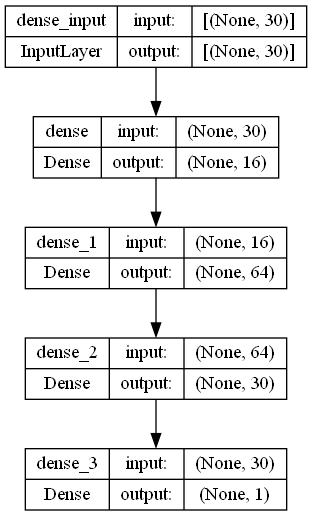

In [55]:
# Visualisasi struktur Sequential API
tf.keras.utils.plot_model(model_seq, show_shapes=True)

Hasil output diatas adalah struktur dari model Sequential API yang telah dirancang. Dimana terdapat layer input, 3 hidden layer, dan output layer. Input layer terdapat 30 neuron (plus 1 bias), hidden layer pertama terdapat 16 neuron (plus 1 bias), hidden layer kedua terdapat 64 neuron (plus 1 bias), hidden layer ketiga terdapat 30 neuron (plus 1 bias), dan layer output hanya terdapat 1 neuron karena hanya ingin mencari prediksi dalam bentuk binary (0 atau 1). Kemudian jumlah trainable parameternya berjumlah 3565 parameter.

### Sequential API Training

In [56]:
# Train model
history_seq = model_seq.fit(train_pipe, epochs=50, validation_data=val_pipe)

Epoch 1/50
1672/1672 [==============================] - 7s 2ms/step - loss: 0.2848 - recall: 0.8621 - auc: 0.9381 - val_loss: 0.2561 - val_recall: 0.8781 - val_auc: 0.9471
Epoch 2/50
1672/1672 [==============================] - 3s 2ms/step - loss: 0.2553 - recall: 0.8657 - auc: 0.9479 - val_loss: 0.2636 - val_recall: 0.9672 - val_auc: 0.9466
Epoch 3/50
1672/1672 [==============================] - 3s 2ms/step - loss: 0.2538 - recall: 0.8683 - auc: 0.9487 - val_loss: 0.2559 - val_recall: 0.9109 - val_auc: 0.9470
Epoch 4/50
1672/1672 [==============================] - 3s 2ms/step - loss: 0.2525 - recall: 0.8714 - auc: 0.9496 - val_loss: 0.2551 - val_recall: 0.9039 - val_auc: 0.9485
Epoch 5/50
1672/1672 [==============================] - 3s 2ms/step - loss: 0.2518 - recall: 0.8715 - auc: 0.9502 - val_loss: 0.2537 - val_recall: 0.8758 - val_auc: 0.9487
Epoch 6/50
1672/1672 [==============================] - 3s 2ms/step - loss: 0.2508 - recall: 0.8746 - auc: 0.9508 - val_loss: 0.2537 - val_r

### Sequential API Evaluation

In [57]:
# Convert hasil training ke dataframe
history_seq_df = pd.DataFrame(history_seq.history)
history_seq_df.head(10)

,loss,recall,auc,val_loss,val_recall,val_auc
0,0.284751,0.862138,0.938088,0.256118,0.878125,0.947067
1,0.255316,0.865697,0.947863,0.263551,0.967188,0.946619
2,0.253802,0.868288,0.948708,0.255949,0.910937,0.946988
3,0.252526,0.871363,0.949637,0.255076,0.903906,0.948543
4,0.251801,0.871502,0.950216,0.253685,0.875781,0.948662
5,0.250836,0.874646,0.950849,0.253663,0.873438,0.948787
6,0.249687,0.882109,0.951892,0.253499,0.924609,0.949613
7,0.247724,0.895170,0.953715,0.251605,0.838672,0.952327
8,0.244586,0.908127,0.956793,0.244228,0.921094,0.959434
9,0.237506,0.922604,0.961794,0.236155,0.959766,0.965622


Text(0, 0.5, 'ROC AUC')

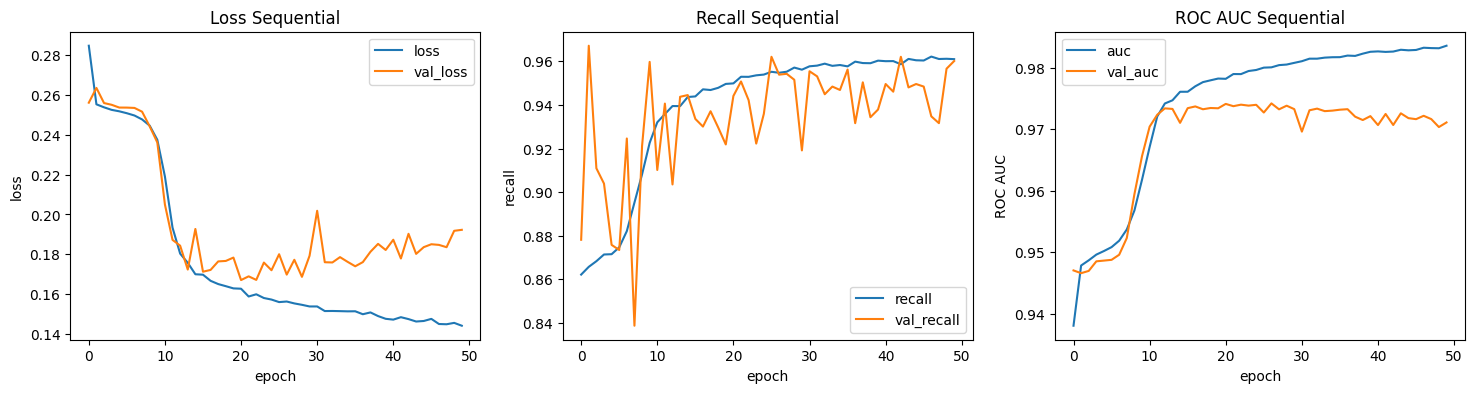

In [58]:
# Plot hasil training
plt.figure(figsize=(18, 4))
plt.subplot(1, 3, 1)
sns.lineplot(history_seq_df[["loss", "val_loss"]], dashes=False)
plt.title("Loss Sequential")
plt.xlabel("epoch")
plt.ylabel("loss")

plt.subplot(1, 3, 2)
sns.lineplot(history_seq_df[["recall", "val_recall"]], dashes=False)
plt.title("Recall Sequential")
plt.xlabel("epoch")
plt.ylabel("recall")

plt.subplot(1, 3, 3)
sns.lineplot(history_seq_df[["auc", "val_auc"]], dashes=False)
plt.title("ROC AUC Sequential")
plt.xlabel("epoch")
plt.ylabel("ROC AUC")

Dari hasil plotting history sequential, didapatkan pada loss dan ROC AUC train dan validationnya cenderung menjauh satu sama lain pada epoch 15 sampai seterusnya. Kemudian pada recall validationnya mengalami explode dari epoch awal hingga epoch akhir.

In [59]:
y_pred_seq = model_seq.predict(X_test_final)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

seq_recall_score = recall_score(y_test, y_pred_seq)
seq_roc_score = roc_auc_score(y_test, y_pred_seq)

print(classification_report(y_test, y_pred_seq))
print("Recall Sequential : ", seq_recall_score)
print("ROC AUC Sequential : ", seq_roc_score)

174/174 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      2565
           1       0.90      0.96      0.93      2987

    accuracy                           0.92      5552
   macro avg       0.93      0.92      0.92      5552
weighted avg       0.92      0.92      0.92      5552

Recall Sequential :  0.958486776029461
ROC AUC Sequential :  0.9205689240771087


Dari hasil evaluasi metrics setelah memprediksi test-set, didapatkan nilai recall model sequential adalah 0.958 dan nilai ROC AUC-nya adalah 0.920. Artinya model sequential sudah cukup baik dalam meminimalisir false negative dan mengetahui perbedaan churn dan tidak churn.

## Sequential API Improve

### Sequential API Improve Definition

Sequential API Improve merupakan model sequential yang akan diimprovisasi berdasarkan struktur yang sudah dibuat sebelumnya. Improvisasi pada model ini adalah dengan menambahkan dropout layer.

In [60]:
# Clear session
os.environ["PYTHONHASHSEED"]=str(2)
tf.keras.backend.clear_session()
tf.random.set_seed(2)
np.random.seed(2)
random.seed(2)

# Membuat struktur Sequential Improve
model_seq_kai = Sequential()
model_seq_kai.add(Dense(16, activation="relu", input_shape=(X_train_final.shape[1],))) # Hidden layer
model_seq_kai.add(Dense(64, activation="relu")) # Hidden Layer
model_seq_kai.add(tf.keras.layers.Dropout(rate=0.2)) # Dropout Layer
model_seq_kai.add(Dense(30, activation="relu")) # Hidden Layer
model_seq_kai.add(tf.keras.layers.Dropout(rate=0.2)) # Dropout Layer
model_seq_kai.add(Dense(1, activation="sigmoid")) # Output Layer

# Compile
model_seq_kai.compile(loss="binary_crossentropy", optimizer="Adam", metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])
model_seq_kai.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                496       
                                                                 
 dense_1 (Dense)             (None, 64)                1088      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 30)                1950      
                                                                 
 dropout_1 (Dropout)         (None, 30)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 3,565
Trainable params: 3,565
Non-trainabl

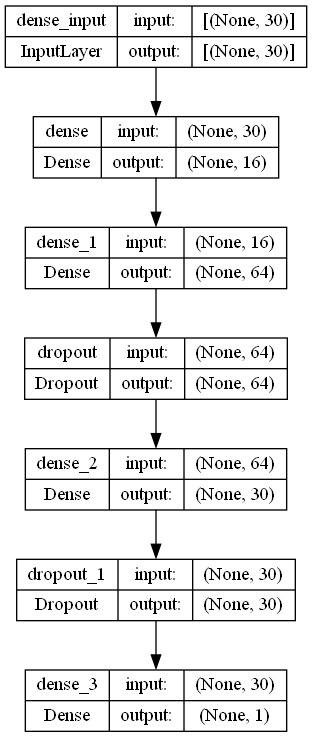

In [61]:
# Visualisasi Sequential API Improve
tf.keras.utils.plot_model(model_seq_kai, show_shapes=True)

### Sequential API Improve Training

In [62]:
# Train model
history_seq_kai = model_seq_kai.fit(train_pipe, epochs=50, validation_data=val_pipe)

Epoch 1/50
1672/1672 [==============================] - 4s 2ms/step - loss: 0.2955 - recall: 0.8712 - auc: 0.9352 - val_loss: 0.2548 - val_recall: 0.8191 - val_auc: 0.9473
Epoch 2/50
1672/1672 [==============================] - 3s 2ms/step - loss: 0.2572 - recall: 0.8660 - auc: 0.9466 - val_loss: 0.2544 - val_recall: 0.9008 - val_auc: 0.9484
Epoch 3/50
1672/1672 [==============================] - 3s 2ms/step - loss: 0.2553 - recall: 0.8815 - auc: 0.9483 - val_loss: 0.2528 - val_recall: 0.8277 - val_auc: 0.9497
Epoch 4/50
1672/1672 [==============================] - 3s 2ms/step - loss: 0.2543 - recall: 0.8846 - auc: 0.9496 - val_loss: 0.2533 - val_recall: 0.8957 - val_auc: 0.9500
Epoch 5/50
1672/1672 [==============================] - 3s 2ms/step - loss: 0.2530 - recall: 0.8918 - auc: 0.9508 - val_loss: 0.2535 - val_recall: 0.9379 - val_auc: 0.9520
Epoch 6/50
1672/1672 [==============================] - 3s 2ms/step - loss: 0.2510 - recall: 0.9011 - auc: 0.9528 - val_loss: 0.2480 - val_r

### Sequential API Improve Evaluation

In [63]:
# Convert hasil training ke dataframe
history_seq_kai_df = pd.DataFrame(history_seq_kai.history)
history_seq_kai_df.head(10)

,loss,recall,auc,val_loss,val_recall,val_auc
0,0.295549,0.871225,0.935240,0.254793,0.819141,0.947269
1,0.257208,0.865973,0.946593,0.254428,0.900781,0.948424
2,0.255333,0.881487,0.948300,0.252839,0.827734,0.949674
3,0.254313,0.884562,0.949611,0.253304,0.895703,0.950003
4,0.253041,0.891818,0.950817,0.253496,0.937891,0.951957
5,0.250999,0.901078,0.952836,0.248032,0.883203,0.955383
6,0.246618,0.918250,0.956525,0.240955,0.900391,0.959636
7,0.232705,0.936632,0.963107,0.216197,0.941406,0.966504
8,0.211136,0.944959,0.967951,0.208987,0.973437,0.969262
9,0.193686,0.951109,0.971511,0.182948,0.942187,0.972970


Text(0, 0.5, 'ROC AUC')

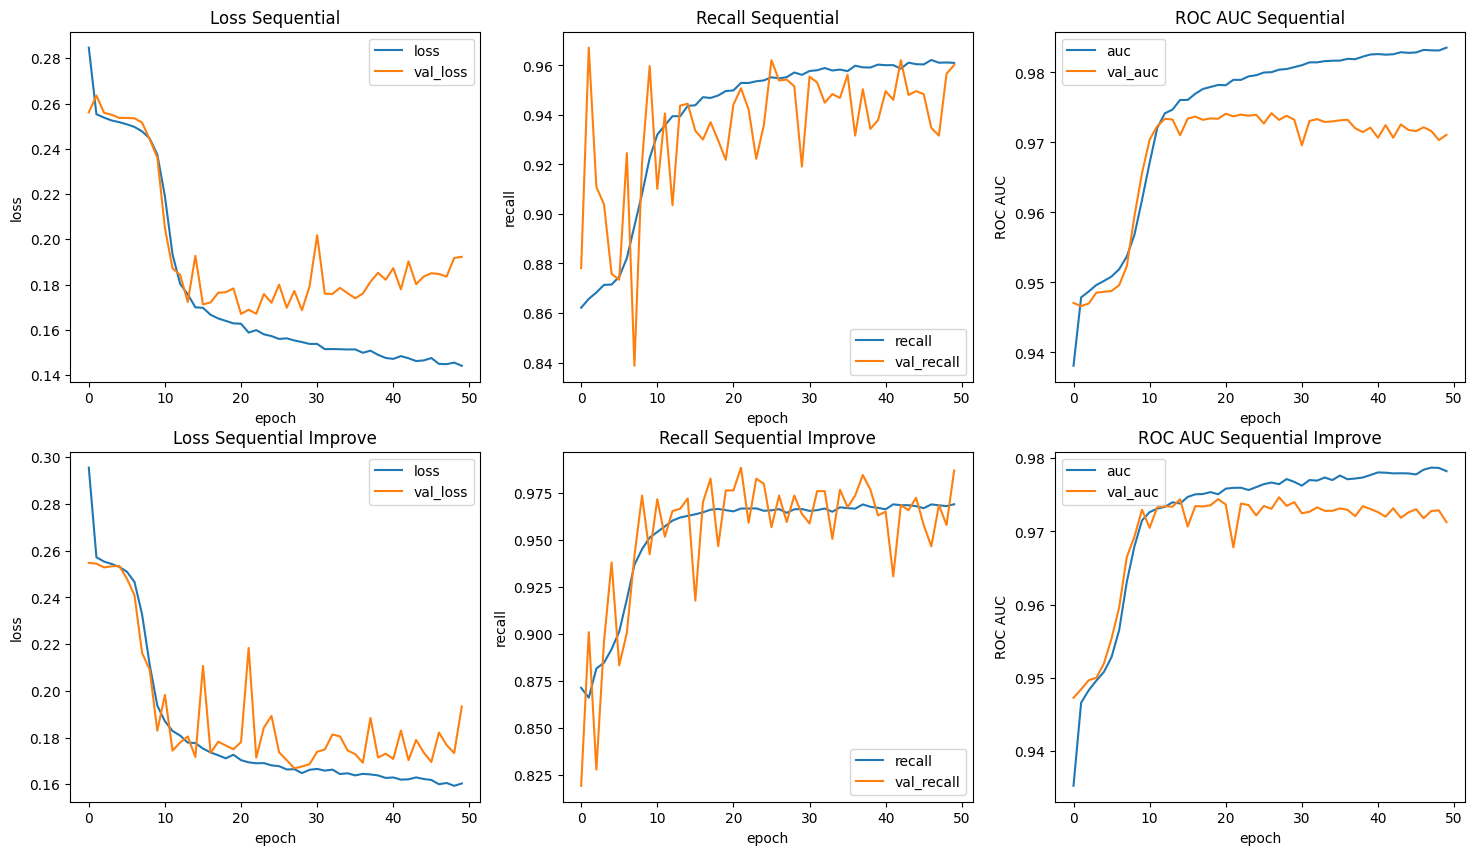

In [64]:
# Plot hasil training sequential sebelum improve dan sesudah improve
plt.figure(figsize=(18,  10))

plt.subplot(2, 3, 1)
sns.lineplot(history_seq_df[["loss", "val_loss"]], dashes=False)
plt.title("Loss Sequential")
plt.xlabel("epoch")
plt.ylabel("loss")

plt.subplot(2, 3, 2)
sns.lineplot(history_seq_df[["recall", "val_recall"]], dashes=False)
plt.title("Recall Sequential")
plt.xlabel("epoch")
plt.ylabel("recall")

plt.subplot(2, 3, 3)
sns.lineplot(history_seq_df[["auc", "val_auc"]], dashes=False)
plt.title("ROC AUC Sequential")
plt.xlabel("epoch")
plt.ylabel("ROC AUC")

plt.subplot(2, 3, 4)
sns.lineplot(history_seq_kai_df[["loss", "val_loss"]], dashes=False)
plt.title("Loss Sequential Improve")
plt.xlabel("epoch")
plt.ylabel("loss")

plt.subplot(2, 3, 5)
sns.lineplot(history_seq_kai_df[["recall", "val_recall"]], dashes=False)
plt.title("Recall Sequential Improve")
plt.xlabel("epoch")
plt.ylabel("recall")

plt.subplot(2, 3, 6)
sns.lineplot(history_seq_kai_df[["auc", "val_auc"]], dashes=False)
plt.title("ROC AUC Sequential Improve")
plt.xlabel("epoch")
plt.ylabel("ROC AUC")

Dari hasil plotting history sequential yang sudah di improve, didapatkan loss, recall, dan ROC AUC-nya sudah lebih stabil dibandingkan dengan yang sebelum di improve. Stabil disini adalah train dan validasinya sudah saling mengikuti dan tidak berjauhan. Kemudian loss menurun dari epoch awal hingga akhir, recall dan ROC AUC naik dari epoch awal hingga akhir.

In [65]:
# Evaluasi Test-Set

y_pred_seq_kai = model_seq_kai.predict(X_test_final)
y_pred_seq_kai = np.where(y_pred_seq_kai >=0.5, 1, 0)

seq_kai_recall_score = recall_score(y_test, y_pred_seq_kai)
seq_kai_roc_score = roc_auc_score(y_test, y_pred_seq_kai)

print(classification_report(y_test, y_pred_seq_kai))
print("Recall Sequential : ", seq_recall_score)
print("ROC AUC Sequential : ", seq_roc_score)
print("Recall Sequential (Improve) : ", seq_kai_recall_score)
print("ROC AUC Sequential (Improve) : ", seq_kai_roc_score)

174/174 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.98      0.83      0.90      2565
           1       0.87      0.99      0.93      2987

    accuracy                           0.92      5552
   macro avg       0.93      0.91      0.91      5552
weighted avg       0.92      0.92      0.92      5552

Recall Sequential :  0.958486776029461
ROC AUC Sequential :  0.9205689240771087
Recall Sequential (Improve) :  0.987612989621694
ROC AUC Sequential (Improve) :  0.9101807638166949


In [66]:
y_pred_seq_kai

array([[1],
       [1],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [67]:
df_x = pd.DataFrame(y_pred_seq_kai, index=X_test.index, columns=["churn_pred"])

In [68]:
df_ft = pd.concat([X_test, df_x], axis=1)
df_ft

,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,avg_transaction_value,points_in_wallet,offer_application_preference,feedback,churn_pred
1338,City,No Membership,Yes,Credit/Debit Card Offers,Desktop,47786.58,639.310000,No,Poor Product Quality,1
28201,Town,No Membership,Yes,Gift Vouchers/Coupons,Desktop,28900.20,1052.060873,No,Poor Website,1
31716,Town,Platinum Membership,Yes,Without Offers,Smartphone,12010.67,711.660000,No,Poor Customer Service,0
30880,Town,Premium Membership,Yes,Credit/Debit Card Offers,Both,35945.31,723.360000,Yes,Too many ads,0
31227,Town,Basic Membership,Yes,Gift Vouchers/Coupons,Desktop,20232.62,203.938020,Yes,Too many ads,1
...,...,...,...,...,...,...,...,...,...,...
29366,Village,Basic Membership,Yes,Without Offers,Smartphone,44982.87,700.200000,No,Poor Website,1
26069,Town,No Membership,Yes,Without Offers,Smartphone,42436.26,616.220000,Yes,Poor Customer Service,1
14150,Town,No Membership,No,Credit/Debit Card Offers,Desktop,26909.04,518.945953,No,Poor Product Quality,1
6194,Town,Gold Membership,No,Credit/Debit Card Offers,Smartphone,4763.05,702.350000,No,No reason specified,1


In [69]:
axax = df_ft[["feedback", "churn_pred"]].groupby("churn_pred").value_counts()
axax_df = pd.DataFrame(axax, columns=["amount"])
axax_df.reset_index(inplace=True)
axax_df

,churn_pred,feedback,amount
0,0,No reason specified,302
1,0,Poor Website,276
2,0,Poor Customer Service,266
3,0,Poor Product Quality,258
4,0,Too many ads,257
5,0,Quality Customer Care,212
6,0,Reasonable Price,202
7,0,User Friendly Website,202
8,0,Products always in Stock,198
9,1,Too many ads,692


In [70]:
axax_fin = axax_df[(axax_df["churn_pred"] == 1) & (axax_df["feedback"] != "No reason specified")][["feedback", "amount"]]
axax_fin

,feedback,amount
9,Too many ads,692
11,Poor Website,691
12,Poor Product Quality,679
13,Poor Customer Service,626


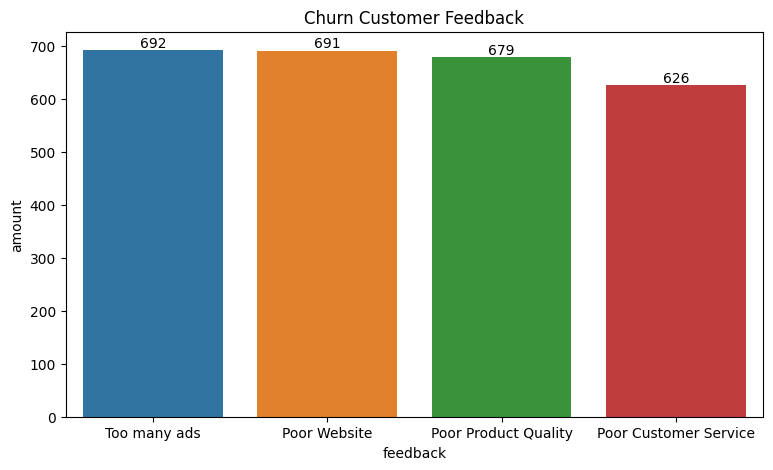

In [71]:
plt.figure(figsize=(9,5))
axaxax = sns.barplot(data=axax_fin, x=axax_fin.feedback, y=axax_fin.amount)
plt.title("Churn Customer Feedback")
for i in axaxax.containers:
    axaxax.bar_label(i,)

In [72]:
bxbx = df_ft[["membership_category", "churn_pred"]].groupby("churn_pred").value_counts()
bxbx_df = pd.DataFrame(bxbx, columns=["amount"])
bxbx_df.reset_index(inplace=True)
bxbx_df

,churn_pred,membership_category,amount
0,0,Platinum Membership,689
1,0,Premium Membership,651
2,0,Gold Membership,524
3,0,Silver Membership,309
4,1,Basic Membership,1168
5,1,No Membership,1162
6,1,Silver Membership,554
7,1,Gold Membership,495


In [73]:
bxbx_fin = bxbx_df[bxbx_df["churn_pred"] == 1][["membership_category", "amount"]]
bxbx_fin

,membership_category,amount
4,Basic Membership,1168
5,No Membership,1162
6,Silver Membership,554
7,Gold Membership,495


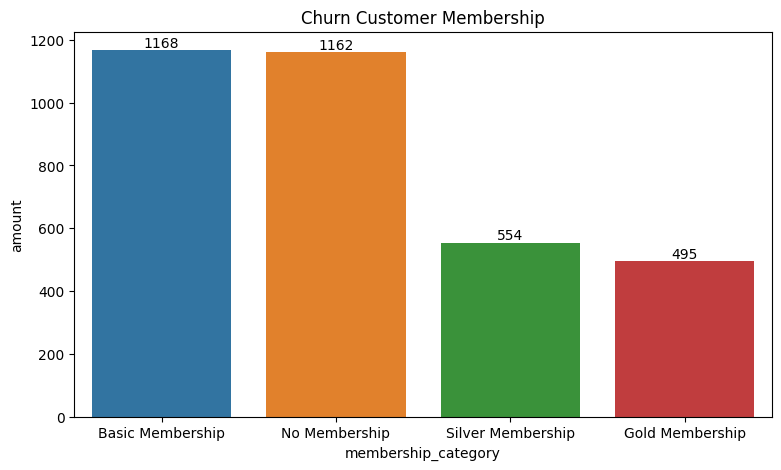

In [74]:
plt.figure(figsize=(9,5))
bxbxbx = sns.barplot(data=bxbx_fin, x=bxbx_fin.membership_category, y=bxbx_fin.amount)
plt.title("Churn Customer Membership")
for i in bxbxbx.containers:
    bxbxbx.bar_label(i,)

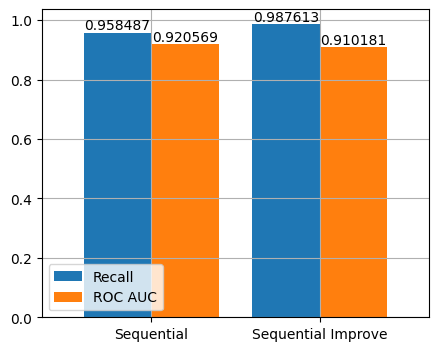

In [75]:
dseq = {
    "Recall" : [seq_recall_score, seq_kai_recall_score],
    "ROC AUC" : [seq_roc_score, seq_kai_roc_score]
}

seq_df = pd.DataFrame(data=dseq, index=["Sequential", "Sequential Improve"])

# Visulisasi chart
seq_bar = seq_df.plot(kind="bar", figsize=(5,4), grid=True, width=0.8)
plt.legend(loc='lower left')
plt.xticks(rotation="horizontal")
for i in seq_bar.containers:
    seq_bar.bar_label(i,)

Dari hasil improvisasi sequential, nilai recall terjadi peningkatan yaitu dari 0.958 menjadi 0.987. Tetapi nilai ROC AUC-nya mengalami sedikit penurunan yaitu dari 0.92 menjadi 0.910.

## Functional API

### Functional API Definition
Metode ini lebih fleksibel dibandingkan Sequential, karena dapat menentukan percabangan layer dan jumlah output yang diinginkan. Sehingga dengan Functional API dapat membangun model yang lebih kompleks.

In [76]:
# Clear session
os.environ["PYTHONHASHSEED"]=str(2)
tf.keras.backend.clear_session()
tf.random.set_seed(2)
np.random.seed(2)
random.seed(2)

# Membuat struktur Functional
input_layer = Input(shape=(X_train_final.shape[1],))
hidden_layer1 = Dense(16, activation="relu")(input_layer)
hidden_layer2 = Dense(64, activation="relu")(hidden_layer1)
hidden_layer3 = Dense(100, activation="relu")(hidden_layer2)
hidden_layer4 = Dense(30, activation="relu")(hidden_layer3)
concat_layer = concatenate([input_layer, hidden_layer4])
output_layer = Dense(1, activation="sigmoid")(concat_layer)
model_func = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_func.compile(loss="binary_crossentropy", optimizer="Adam", metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])
model_func.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 30)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 16)           496         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 64)           1088        ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 100)          6500        ['dense_1[0][0]']                
                                                                                              

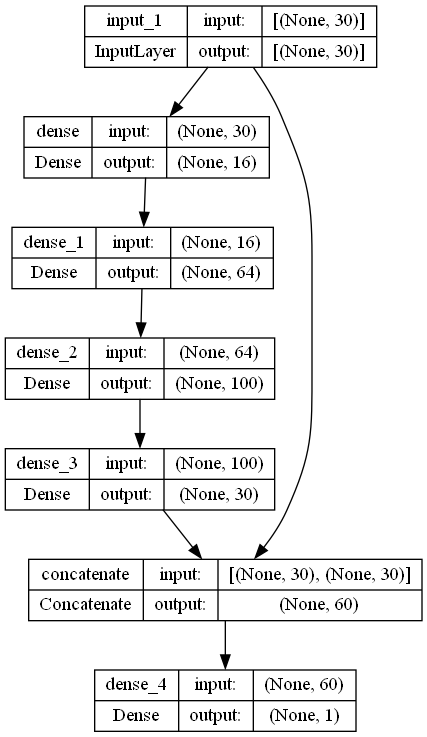

In [77]:
# Visualisasi Functional API
tf.keras.utils.plot_model(model_func, show_shapes=True)

Hasil output diatas adalah struktur dari model Functional API yang telah dirancang. Dimana terdapat layer input, 5 hidden layer, dan output layer. Input layer terdapat 30 neuron (plus 1 bias), hidden layer pertama terdapat 16 neuron (plus 1 bias), hidden layer kedua terdapat 64 neuron (plus 1 bias), hidden layer ketiga terdapat 100 neuron (plus 1 bias), hidden layer keempat terdapat 30 neuron (plus 1 bias), hidden layer kelima merupakan gabungan dari hidden layer 4 dan input layer sehingga terdapat 60 neuron (plus 1 bias) dan layer output hanya terdapat 1 neuron karena hanya ingin mencari prediksi dalam bentuk binary (0 atau 1). Kemudian jumlah trainable parameternya berjumlah 11.175 parameter.

### Functional API Training

In [78]:
# Train model
history_func = model_func.fit(train_pipe, epochs=50, validation_data=val_pipe)

Epoch 1/50
1672/1672 [==============================] - 5s 2ms/step - loss: 0.2823 - recall: 0.8612 - auc: 0.9378 - val_loss: 0.2562 - val_recall: 0.7957 - val_auc: 0.9467
Epoch 2/50
1672/1672 [==============================] - 3s 2ms/step - loss: 0.2545 - recall: 0.8615 - auc: 0.9477 - val_loss: 0.2550 - val_recall: 0.7969 - val_auc: 0.9476
Epoch 3/50
1672/1672 [==============================] - 3s 2ms/step - loss: 0.2530 - recall: 0.8628 - auc: 0.9492 - val_loss: 0.2543 - val_recall: 0.8082 - val_auc: 0.9482
Epoch 4/50
1672/1672 [==============================] - 3s 2ms/step - loss: 0.2521 - recall: 0.8645 - auc: 0.9499 - val_loss: 0.2549 - val_recall: 0.8492 - val_auc: 0.9479
Epoch 5/50
1672/1672 [==============================] - 3s 2ms/step - loss: 0.2515 - recall: 0.8665 - auc: 0.9508 - val_loss: 0.2543 - val_recall: 0.8594 - val_auc: 0.9479
Epoch 6/50
1672/1672 [==============================] - 3s 2ms/step - loss: 0.2506 - recall: 0.8714 - auc: 0.9518 - val_loss: 0.2561 - val_r

### Functional API Evaluation

In [79]:
# Convert hasil training ke dataframe
history_func_df = pd.DataFrame(history_func.history)
history_func_df.head(10)

,loss,recall,auc,val_loss,val_recall,val_auc
0,0.282282,0.861240,0.937819,0.256163,0.795703,0.946688
1,0.254470,0.861482,0.947667,0.255045,0.796875,0.947590
2,0.253014,0.862795,0.949151,0.254348,0.808203,0.948245
3,0.252121,0.864453,0.949883,0.254942,0.849219,0.947867
4,0.251518,0.866526,0.950828,0.254280,0.859375,0.947865
5,0.250635,0.871363,0.951796,0.256067,0.938281,0.948874
6,0.249329,0.881245,0.952575,0.254433,0.864062,0.948152
7,0.248901,0.885944,0.952886,0.253582,0.860156,0.950020
8,0.245457,0.894410,0.955561,0.243652,0.876562,0.956003
9,0.211062,0.923813,0.967775,0.192350,0.931250,0.970214


Text(0, 0.5, 'ROC AUC')

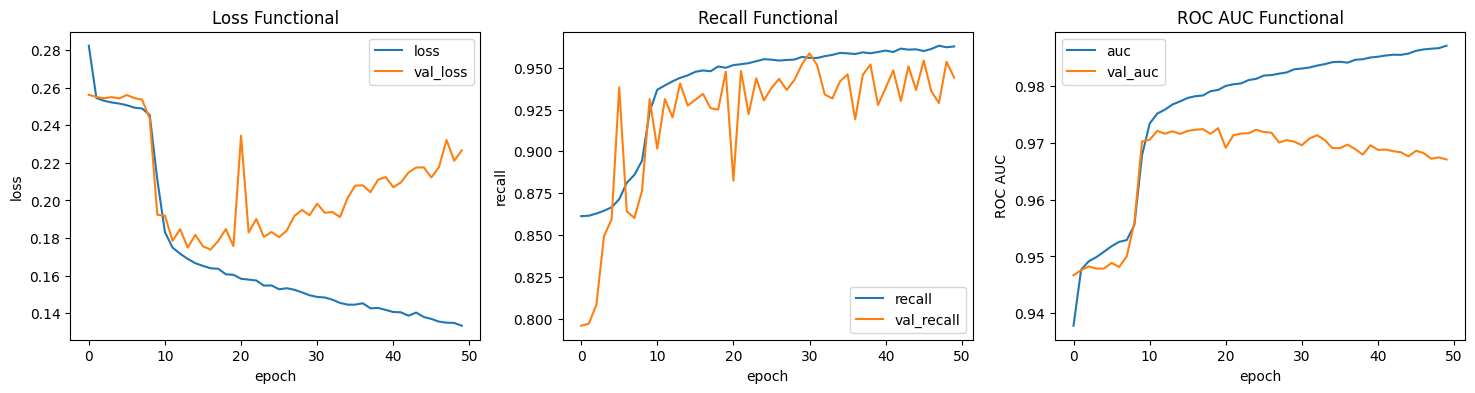

In [80]:
# Plot hasil training
plt.figure(figsize=(18, 4))
plt.subplot(1, 3, 1)
sns.lineplot(history_func_df[["loss", "val_loss"]], dashes=False)
plt.title("Loss Functional")
plt.xlabel("epoch")
plt.ylabel("loss")

plt.subplot(1, 3, 2)
sns.lineplot(history_func_df[["recall", "val_recall"]], dashes=False)
plt.title("Recall Functional")
plt.xlabel("epoch")
plt.ylabel("recall")

plt.subplot(1, 3, 3)
sns.lineplot(history_func_df[["auc", "val_auc"]], dashes=False)
plt.title("ROC AUC Functional")
plt.xlabel("epoch")
plt.ylabel("ROC AUC")

Dari hasil plotting history functional, didapatkan pada loss dan ROC AUC train dan validationnya cenderung menjauh satu sama lain pada epoch 10 hingga seterusnya. Kemudian pada recall validationnya mengalami explode tetapi cenderung lebih stabil dibandingkan dengan sequential.

In [81]:
# Evaluasi Test-Set

y_pred_func = model_func.predict(X_test_final)
y_pred_func = np.where(y_pred_func >=0.5, 1, 0)

func_recall_score = recall_score(y_test, y_pred_func)
func_roc_score = roc_auc_score(y_test, y_pred_func)

print(classification_report(y_test, y_pred_func))
print("Recall Functional : ", func_recall_score)
print("ROC AUC Functional : ", func_roc_score)

174/174 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      2565
           1       0.92      0.94      0.93      2987

    accuracy                           0.92      5552
   macro avg       0.92      0.92      0.92      5552
weighted avg       0.92      0.92      0.92      5552

Recall Functional :  0.9377301640441915
ROC AUC Functional :  0.9224713198388599


Dari hasil evaluasi metrics setelah memprediksi test-set, didapatkan nilai recall model functional adalah 0.937 dan nilai ROC AUC-nya adalah 0.922. Artinya model functional juga sudah cukup baik dalam meminimalisir false negative dan mengetahui perbedaan churn dan tidak churn.

## Functional API Improve

### Functional API Improve Definition

Functional API Improve merupakan model functional yang akan diimprovisasi berdasarkan struktur yang sudah dibuat sebelumnya. Improvisasi pada model ini adalah dengan menambahkan dropout layer.

In [82]:
# Clear session
os.environ["PYTHONHASHSEED"]=str(2)
tf.keras.backend.clear_session()
tf.random.set_seed(2)
np.random.seed(2)
random.seed(2)

# Membuat struktur Functional Improve
input_layer = Input(shape=(X_train_final.shape[1],))
hidden_layer1 = Dense(16, activation="relu")(input_layer)
dropout_layer1 = Dropout(0.2)(hidden_layer1)
hidden_layer2 = Dense(64, activation="relu")(dropout_layer1)
dropout_layer2 = Dropout(0.2)(hidden_layer2)
hidden_layer3 = Dense(100, activation="relu")(dropout_layer2)
dropout_layer3 = Dropout(0.2)(hidden_layer3)
hidden_layer4 = Dense(30, activation="relu")(dropout_layer3)
dropout_layer4 = Dropout(0.2)(hidden_layer4)
concat_layer = concatenate([input_layer, dropout_layer4])
dropout_layer5 = Dropout(0.2)(concat_layer)
output_layer = Dense(1, activation="sigmoid")(dropout_layer5)
model_func_kai = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_func_kai.compile(loss="binary_crossentropy", optimizer="Adam", metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])
model_func_kai.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 30)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 16)           496         ['input_1[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 16)           0           ['dense[0][0]']                  
                                                                                                  
 dense_1 (Dense)                (None, 64)           1088        ['dropout[0][0]']                
                                                                                              

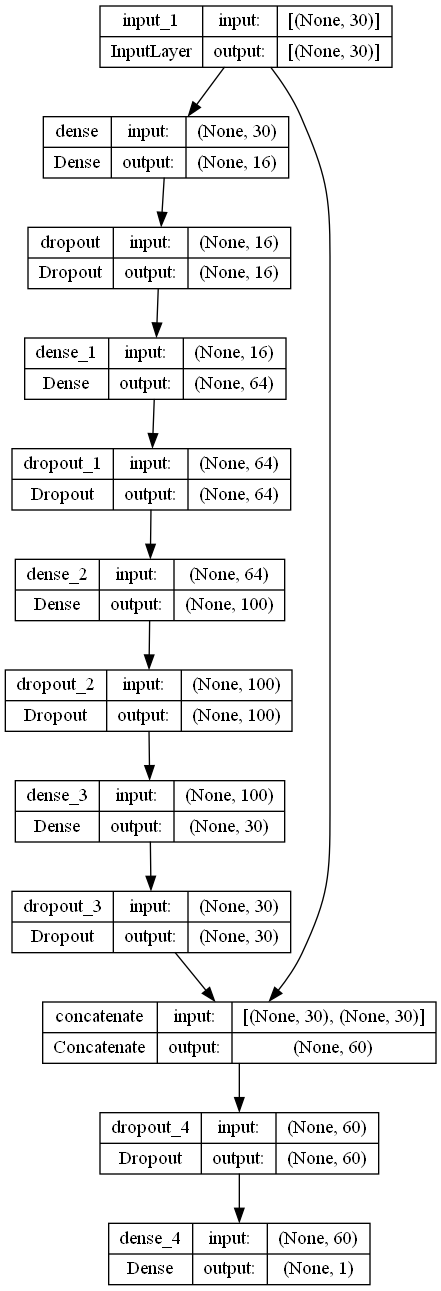

In [83]:
# Visualisasi Sequential API Improve
tf.keras.utils.plot_model(model_func_kai, show_shapes=True)

### Functional API Improve Training

In [84]:
# Train model
history_func_kai = model_func_kai.fit(train_pipe, epochs=50, validation_data=val_pipe)

Epoch 1/50
1672/1672 [==============================] - 6s 3ms/step - loss: 0.3195 - recall: 0.8541 - auc: 0.9286 - val_loss: 0.2550 - val_recall: 0.8414 - val_auc: 0.9458
Epoch 2/50
1672/1672 [==============================] - 6s 4ms/step - loss: 0.2639 - recall: 0.8651 - auc: 0.9446 - val_loss: 0.2582 - val_recall: 0.7688 - val_auc: 0.9483
Epoch 3/50
1672/1672 [==============================] - 5s 3ms/step - loss: 0.2604 - recall: 0.8649 - auc: 0.9456 - val_loss: 0.2543 - val_recall: 0.8582 - val_auc: 0.9488
Epoch 4/50
1672/1672 [==============================] - 4s 2ms/step - loss: 0.2591 - recall: 0.8665 - auc: 0.9457 - val_loss: 0.2542 - val_recall: 0.8516 - val_auc: 0.9476
Epoch 5/50
1672/1672 [==============================] - 6s 3ms/step - loss: 0.2581 - recall: 0.8661 - auc: 0.9466 - val_loss: 0.2562 - val_recall: 0.8297 - val_auc: 0.9479
Epoch 6/50
1672/1672 [==============================] - 4s 2ms/step - loss: 0.2572 - recall: 0.8726 - auc: 0.9471 - val_loss: 0.2559 - val_r

### Functional API Improve Evaluation

In [85]:
# Convert hasil training ke dataframe
history_func_kai_df = pd.DataFrame(history_func_kai.history)
history_func_kai_df.head(10)

,loss,recall,auc,val_loss,val_recall,val_auc
0,0.319451,0.854087,0.928646,0.254963,0.841406,0.945825
1,0.263870,0.865075,0.944634,0.258211,0.768750,0.948252
2,0.260385,0.864902,0.945614,0.254311,0.858203,0.948784
3,0.259080,0.866457,0.945684,0.254232,0.851562,0.947586
4,0.258122,0.866146,0.946570,0.256249,0.829687,0.947888
5,0.257180,0.872607,0.947119,0.255922,0.894531,0.946259
6,0.256861,0.875959,0.947791,0.254566,0.894531,0.950037
7,0.253889,0.887154,0.950287,0.248892,0.830469,0.956682
8,0.244744,0.919494,0.956676,0.226352,0.875781,0.964052
9,0.227639,0.933937,0.963011,0.212522,0.973047,0.968554


Text(0, 0.5, 'ROC AUC')

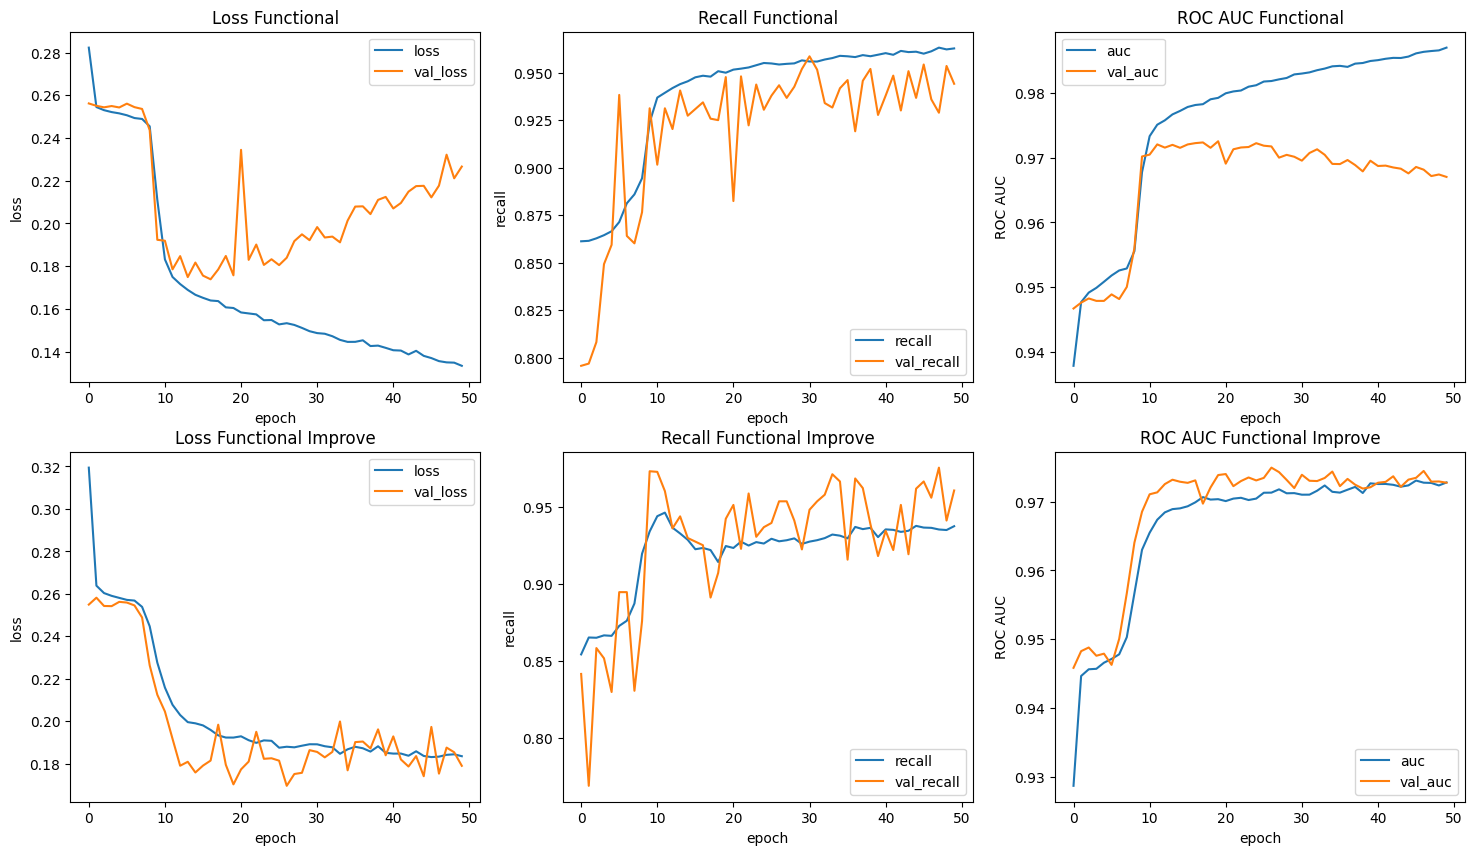

In [86]:
# Plot hasil training functional sebelum improve dan sesudah improve
plt.figure(figsize=(18,  10))

plt.subplot(2, 3, 1)
sns.lineplot(history_func_df[["loss", "val_loss"]], dashes=False)
plt.title("Loss Functional")
plt.xlabel("epoch")
plt.ylabel("loss")

plt.subplot(2, 3, 2)
sns.lineplot(history_func_df[["recall", "val_recall"]], dashes=False)
plt.title("Recall Functional")
plt.xlabel("epoch")
plt.ylabel("recall")

plt.subplot(2, 3, 3)
sns.lineplot(history_func_df[["auc", "val_auc"]], dashes=False)
plt.title("ROC AUC Functional")
plt.xlabel("epoch")
plt.ylabel("ROC AUC")

plt.subplot(2, 3, 4)
sns.lineplot(history_func_kai_df[["loss", "val_loss"]], dashes=False)
plt.title("Loss Functional Improve")
plt.xlabel("epoch")
plt.ylabel("loss")

plt.subplot(2, 3, 5)
sns.lineplot(history_func_kai_df[["recall", "val_recall"]], dashes=False)
plt.title("Recall Functional Improve")
plt.xlabel("epoch")
plt.ylabel("recall")

plt.subplot(2, 3, 6)
sns.lineplot(history_func_kai_df[["auc", "val_auc"]], dashes=False)
plt.title("ROC AUC Functional Improve")
plt.xlabel("epoch")
plt.ylabel("ROC AUC")

Dari hasil plotting history functional yang sudah di improve, didapatkan loss, recall, dan ROC AUC-nya sudah cukup stabil dibandingkan dengan yang sebelum di improve. Stabil disini adalah train dan validasinya sudah saling mengikuti dan tidak berjauhan. Kemudian loss menurun dari epoch awal hingga akhir, recall dan ROC AUC naik dari epoch awal hingga akhir.

In [87]:
# Evaluasi Test-Set

y_pred_func_kai = model_func_kai.predict(X_test_final)
y_pred_func_kai = np.where(y_pred_func_kai >=0.5, 1, 0)

func_kai_recall_score = recall_score(y_test, y_pred_func_kai)
func_kai_roc_score = roc_auc_score(y_test, y_pred_func_kai)

print(classification_report(y_test, y_pred_func_kai))
print("Recall Functional : ", func_recall_score)
print("ROC AUC Functional : ", func_roc_score)
print("Recall Functional (Improve) : ", func_kai_recall_score)
print("ROC AUC Functional (Improve) : ", func_kai_roc_score)

174/174 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      2565
           1       0.91      0.96      0.93      2987

    accuracy                           0.93      5552
   macro avg       0.93      0.93      0.93      5552
weighted avg       0.93      0.93      0.93      5552

Recall Functional :  0.9377301640441915
ROC AUC Functional :  0.9224713198388599
Recall Functional (Improve) :  0.9598259122865752
ROC AUC Functional (Improve) :  0.9255269912310069


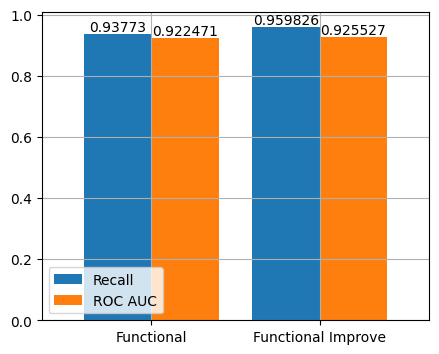

In [88]:
dfunc = {
    "Recall" : [func_recall_score, func_kai_recall_score],
    "ROC AUC" : [func_roc_score, func_kai_roc_score]
}

func_df = pd.DataFrame(data=dfunc, index=["Functional", "Functional Improve"])

# Visulisasi chart
func_bar = func_df.plot(kind="bar", figsize=(5,4), grid=True, width=0.8)
plt.legend(loc='lower left')
plt.xticks(rotation="horizontal")
for i in func_bar.containers:
    func_bar.bar_label(i,)

Dari hasil improvisasi functional, nilai recall terjadi peningkatan dari 0.937 menjadi 0.959. Kemudian untuk nilai ROC AUC terjadi sedikit dari 0.922 menjadi 0.925.

## Final evaluation

Disini akan dilakukan perbandingan antara Sequential dan Functional yang keduanya sudah di improve. Sehingga akan dipilih model mana yang akan dijadikan sebagai model untuk memprediksi churn.

Text(0, 0.5, 'ROC AUC')

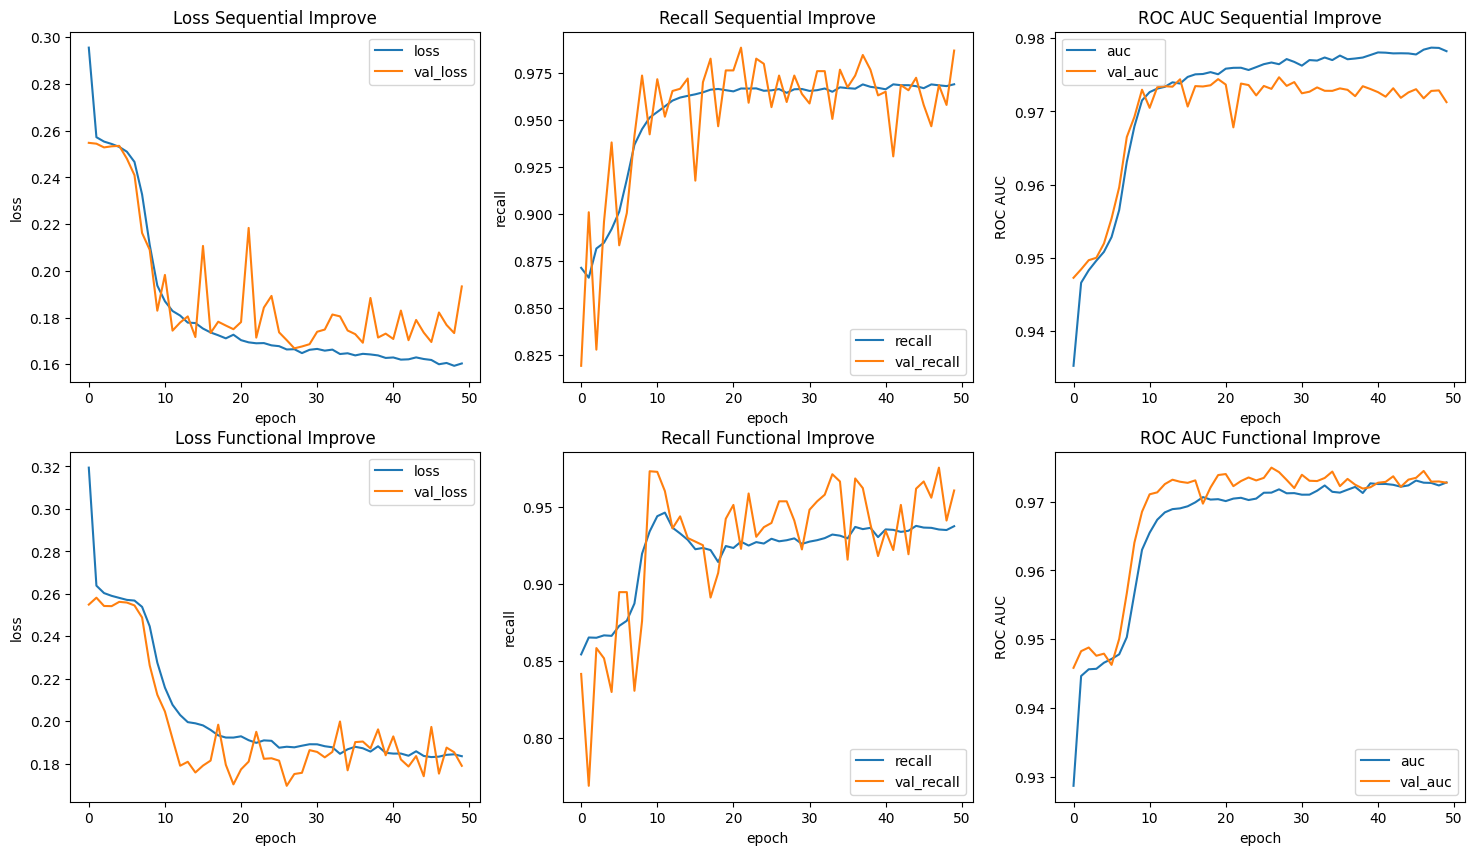

In [89]:
# Plot perbandingan sequential dan functional yang sudah diimprove
plt.figure(figsize=(18,  10))

plt.subplot(2, 3, 1)
sns.lineplot(history_seq_kai_df[["loss", "val_loss"]], dashes=False)
plt.title("Loss Sequential Improve")
plt.xlabel("epoch")
plt.ylabel("loss")

plt.subplot(2, 3, 2)
sns.lineplot(history_seq_kai_df[["recall", "val_recall"]], dashes=False)
plt.title("Recall Sequential Improve")
plt.xlabel("epoch")
plt.ylabel("recall")

plt.subplot(2, 3, 3)
sns.lineplot(history_seq_kai_df[["auc", "val_auc"]], dashes=False)
plt.title("ROC AUC Sequential Improve")
plt.xlabel("epoch")
plt.ylabel("ROC AUC")

plt.subplot(2, 3, 4)
sns.lineplot(history_func_kai_df[["loss", "val_loss"]], dashes=False)
plt.title("Loss Functional Improve")
plt.xlabel("epoch")
plt.ylabel("loss")

plt.subplot(2, 3, 5)
sns.lineplot(history_func_kai_df[["recall", "val_recall"]], dashes=False)
plt.title("Recall Functional Improve")
plt.xlabel("epoch")
plt.ylabel("recall")

plt.subplot(2, 3, 6)
sns.lineplot(history_func_kai_df[["auc", "val_auc"]], dashes=False)
plt.title("ROC AUC Functional Improve")
plt.xlabel("epoch")
plt.ylabel("ROC AUC")

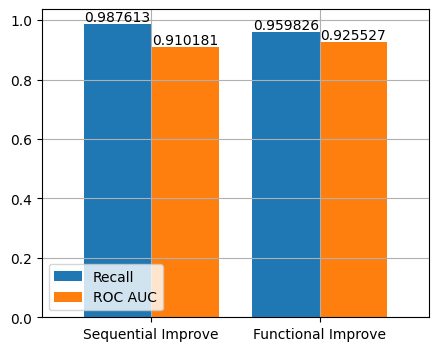

In [90]:
datf = {
    "Recall" : [seq_kai_recall_score, func_kai_recall_score],
    "ROC AUC" : [seq_kai_roc_score, func_kai_roc_score]
}

f_df = pd.DataFrame(data=datf, index=["Sequential Improve", "Functional Improve"])

# Visulisasi chart
f_bar = f_df.plot(kind="bar", figsize=(5,4), grid=True, width=0.8)
plt.legend(loc='lower left')
plt.xticks(rotation="horizontal")
for i in f_bar.containers:
    f_bar.bar_label(i,)

Dari hasil perbandingan, performance model Sequential yang sudah diimprove lebih tinggi dibandingkan model Functional yang sudah diimprove. Hal ini dinyatakan dengan nilai recall dan yang lebih tinggi walaupun nilai ROC AUC nya sedikit lebih rendah. Kemudian berdasarkan waktu training, Sequential lebih cepat dibandingkan dengan Functional. Untuk Sequential rata-rata waktu trainingnya 3-4 detik per epoch, sedangkan Functional 4-5 detik per epoch. Sehingga yang akan dijadikan model untuk memprediksi churn adalah model Sequential yang sudah di improve.

# vii. Model Saving

Pada tahap ini dilakukan penyimpanan fitur yang digunakan, scaler, encoder dan model. Penyimpanan dan menggunakan library pickle (untuk menyimpan library binary) dan json.

In [91]:
# Save scaler
with open("scaler.pkl", "wb") as file_1:
    pickle.dump(scaler, file_1)

# Save encoder
with open("encoder.pkl", "wb") as file_2:
    pickle.dump(encoder, file_2)

# Save fitur numerik
with open("num_columns.txt", "w") as file_3:
    json.dump(num_columns, file_3)

# Save fitur kategorik
with open("cat_columns.txt", "w") as file_4:
    json.dump(cat_columns, file_4)

In [92]:
# Freeze Model

model_seq_kai.trainable = False
model_seq_kai.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                496       
                                                                 
 dense_1 (Dense)             (None, 64)                1088      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 30)                1950      
                                                                 
 dropout_1 (Dropout)         (None, 30)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 3,565
Trainable params: 0
Non-trainable pa

In [93]:
# Save model
model_seq_kai.save("model_ann.h5")

# viii. Model Inference

NOTE : Percobaan menggunakan data inference dapat dilihat pada inference_set.ipynb

# ix. Kesimpulan

Dari hasil training dan prediksi yang dilakukan oleh model yang telah dibuat, model final yang dipilih adalah model yang dirancang dengan metode Sequential. Hal tersebut dibuktikan dengan hasil performance saat dilakukan evaluasi, dimana model Sequential memiliki performance yang lebih baik dibandingkan dengan Functional saat dilakukan training dan juga prediksi. Dari hasil nilai recall saat memprediksi test set sudah cukup tinggi (0.98 atau 98%), artinya pemilihan fitur untuk modeling sudah tepat. Sehingga dapat dikatakan faktor utama yang menyebabkan customer churn pada kasus ini adalah region, jenis membership, referral, preferensi jenis offer, media customer, offer/tawaran, feedback customer, rata-rata transaksi, dan jumlah point di wallet customer.

Dengan membuat model yang fokus untuk meminimalisir false negative/memfokuskan nilai recall, ada kelebihan dan kekurangan pada model ini. Kelebihannya adalah model mampu meminimalisir terjadinya false negative, pada kasus ini false negative adalah customer yang aktualnya churn (terindikasi akan berhenti menggunakan produk) tetapi model cenderung memprediksi customer tersebut tidak churn. Hal tersebut akan lebih merugikan perusahaan dan sulit untuk diantisipasi dibandingkan dengan sebaliknya (customer yang aktualnya tidak churn tetapi terprediksi churn). Kekurangan dari model ini adalah prediksinya cenderung sensitif, artinya mungkin saja aktualnya customer tersebut tidak churn tetapi model memprediksinya sebagai customer yang churn.

Beberapa hal yang mempengaruhi nilai performansi dari model saat melakukan training dan prediksi adalah:
<ul>
    <li>Data imbalance. Umumnya model akan sulit untuk memprediksi data yang jumlah targetnya lebih sedikit dibandingkan dengan yang lebih banyak, biasanya dapat dihandle dengan metode Oversampling atau Undersampling.</li><br>
    <li>Handling missing value. Ada berbagai macam cara untuk menangani missing value seperti CCA, mean median inputation, random input. Pemilihan metode ini juga dapat mempengaruhi akurasi prediksi model.</li><br>
    <li>Handling outlier. Ada berbagai macam cara juga untuk menangani outlier pada data, mulai dari trimming, treat sebagai missing value, atau censoring. Apabila outlier tidak berdampak besar pada data maka dapat dihiraukan. Beberapa algoritma modeling ataupun tahapan feature engineering sensitif terhadap outlier, contohnya pada pemilihan fitur menggunakan korelasi pearson. Data outlier dapat mempengaruhi data yg berkolerasi bisa saja dianggap tidak ada korelasi.</li><br>
    <li>Scaling fitur. Sebelum dilakukan model train perlu dilakukan scaling pada fitur numerik. Tujuannya adalah untuk melakukan penskalaan pada setiap fitur numerik karena umumnya setiap fitur memiliki rentangnya masing-masing.</li><br>
    <li>Encoding fitur. Selain scaling, untuk fitur kategorikal perlu dilakukan encoding. Training model akan bermasalah jika kategorikal tidak diencoding karena pada dasarnya pada proses training model hanya menerima data dalam bentuk numerik (tidak bisa dalam bentuk string), sehingga string perlu diubah kedalam bentuk numerik. Untuk encoding kategorikal yang tidak ada tingkatannya dapat menggunakan One Hot Encoder, kemudian jika ada tingkatannya dapat menggunakan Ordinal Encoder atau Label Encoder. Encoding juga perlu dilakukan pada target jika target berbentuk kategorikal</li><br>
    <li>Pembuatan struktur model. Metode perancangan ANN model dengan cara Sequential atau Functional juga mempengaruhi model. Karena metode perancangannya berbeda maka hasil performance dari model juga akan berbeda.</li><br>
    <li>Improvisasi model yang dibuat. Hal ini dilakukan untuk meningkatkan lagi performance model yang telah dirancang, metode-nya dapat dilakukan penambahan drop layer, pengaturan activation pada layer, batch normalization, gradient cliping, dan sebagainnya.</li><br>
</ul>